##  Introduction

In this notebook, we explore the development of a regression model aimed at predicting students' academic performance, specifically their **Exam Score**, based on a variety of personal, academic, and socio-economic factors. The dataset contains **6,607 student records** and includes both numerical and categorical variables that reflect key influences on learning outcomes.

###  Problem Statement
Academic performance is a multifactorial outcome influenced by behaviors such as **hours studied**, **attendance**, and **sleep patterns**, as well as broader contextual factors like **parental involvement**, **family income**, **school type**, and **peer influence**. Understanding how these factors interact to affect exam scores can help educators and policymakers design targeted interventions.

###  Dataset Overview
The dataset consists of **20 features**, including:

- **Quantitative features**: `Hours_Studied`, `Attendance`, `Sleep_Hours`, `Previous_Scores`, `Tutoring_Sessions`, `Physical_Activity`, and the target `Exam_Score`.
- **Categorical features**: such as `Parental_Involvement`, `Access_to_Resources`, `Motivation_Level`, `Family_Income`, `School_Type`, and more.
- Several features contain **missing values** (e.g., `Teacher_Quality`, `Parental_Education_Level`, `Distance_from_Home`), which will require preprocessing.

###  Objective
The primary objective is to train a regression model that can **accurately predict the exam scores of students** using the available features. The analysis involves data preprocessing, exploratory data analysis (EDA), feature engineering, and the application of machine learning algorithms.

By identifying the most influential predictors, this model could offer insights into which aspects of a student's environment or habits most significantly impact their academic success.


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.feature_selection import f_classif, SelectKBest
import joblib
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from scipy.stats import kendalltau, spearmanr
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import lightgbm as lgb

## Data Exploration

In [ ]:
data = pd.read_csv('StudentPerformanceFactors.csv')

In [38]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [39]:
print(data.describe())

       Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6607.000000  6607.000000   6607.00000      6607.000000   
mean       19.975329    79.977448      7.02906        75.070531   
std         5.990594    11.547475      1.46812        14.399784   
min         1.000000    60.000000      4.00000        50.000000   
25%        16.000000    70.000000      6.00000        63.000000   
50%        20.000000    80.000000      7.00000        75.000000   
75%        24.000000    90.000000      8.00000        88.000000   
max        44.000000   100.000000     10.00000       100.000000   

       Tutoring_Sessions  Physical_Activity   Exam_Score  
count        6607.000000        6607.000000  6607.000000  
mean            1.493719           2.967610    67.235659  
std             1.230570           1.031231     3.890456  
min             0.000000           0.000000    55.000000  
25%             1.000000           2.000000    65.000000  
50%             1.000000           3.00000

In [40]:
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [41]:
print(data.isnull().sum())

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


#### Null Handling

In [42]:
data['Teacher_Quality'].value_counts()

Teacher_Quality
Medium    3925
High      1947
Low        657
Name: count, dtype: int64

In [43]:
data['Teacher_Quality'].fillna(data['Teacher_Quality'].mode()[0], inplace=True)

C:\Users\Ali Madian\AppData\Local\Temp\ipykernel_33844\2795946969.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Teacher_Quality'].fillna(data['Teacher_Quality'].mode()[0], inplace=True)


In [44]:
data['Parental_Education_Level'].value_counts()

Parental_Education_Level
High School     3223
College         1989
Postgraduate    1305
Name: count, dtype: int64

In [45]:
data['Parental_Education_Level'] = data['Parental_Education_Level'].fillna(data['Parental_Education_Level'].mode()[0])

In [46]:
data['Distance_from_Home'].value_counts()

Distance_from_Home
Near        3884
Moderate    1998
Far          658
Name: count, dtype: int64

In [47]:
data['Distance_from_Home'] = data['Distance_from_Home'].fillna(data['Distance_from_Home'].mode()[0])

In [48]:
data.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

## Exploratory Data Analysis

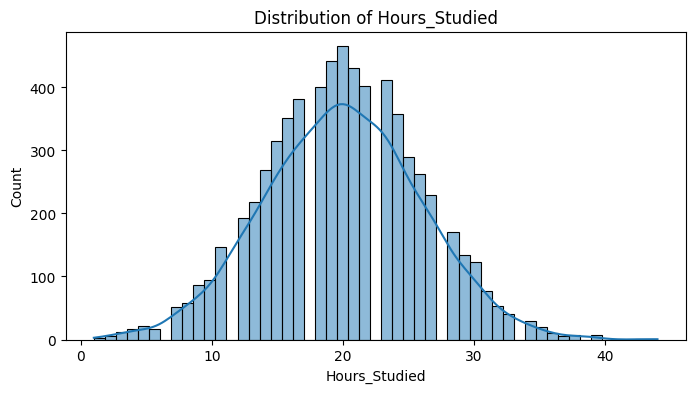

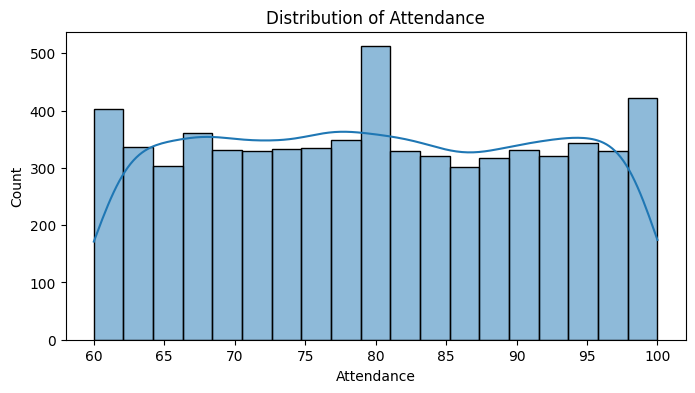

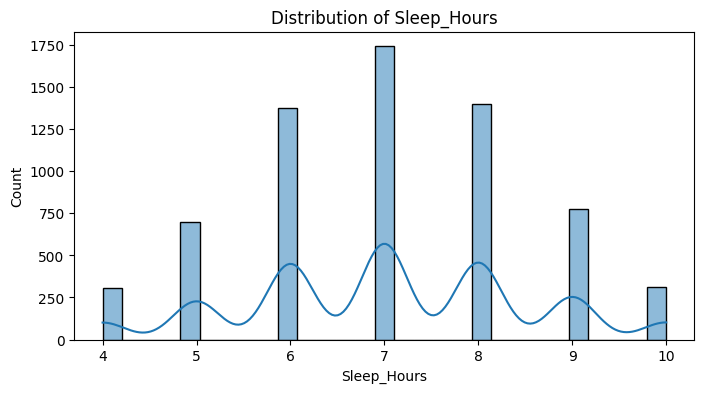

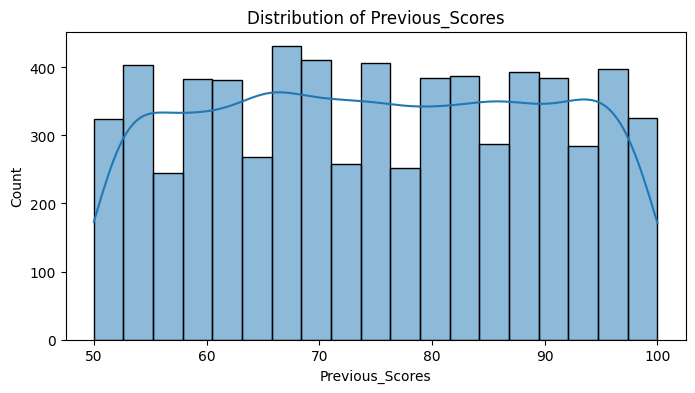

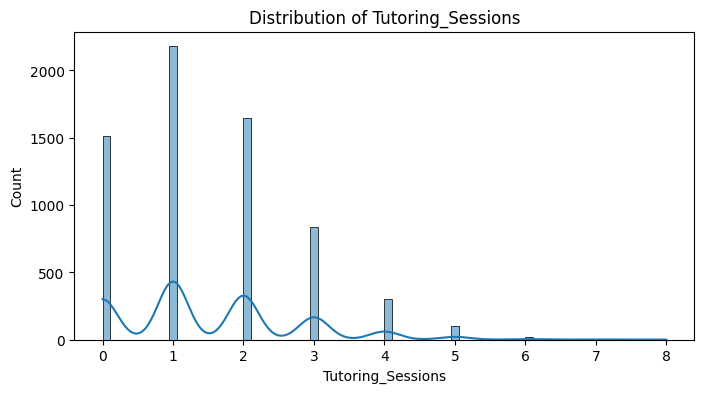

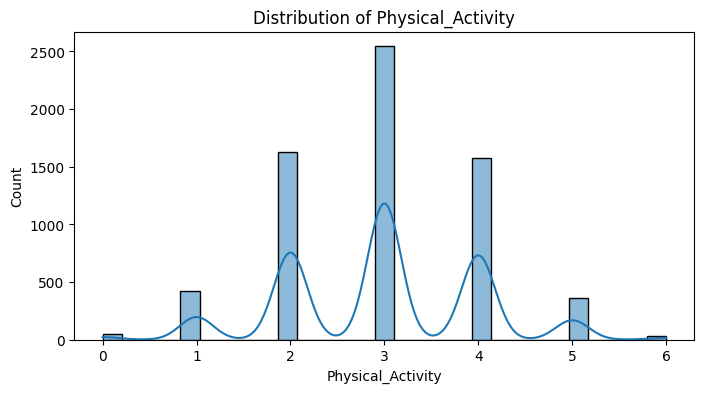

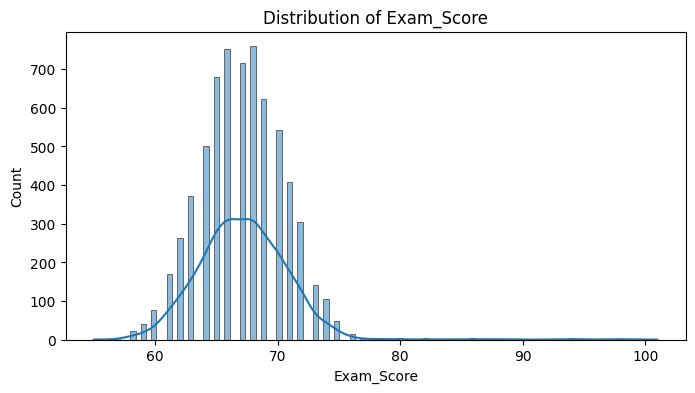

In [49]:
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

Numerical Graphs Analysis:

Hours Studied: Displays a bell-shaped distribution with a peak around 20-25 hours.

Attendance: Shows a bimodal distribution with peaks around 65-70% and 95-100%.

Sleep Hours: Exhibits a bell-shaped distribution with a peak around 7-8 hours.

Previous Scores: Follows a bell-shaped distribution with a peak around 70-80%.

Tutoring Sessions: Shows a skewed distribution with a sharp peak at 1 session and rapid decline thereafter.

Physical Activity: Displays a bimodal distribution with peaks around 2 and 4 activities.

Exam Score: Exhibits a bell-shaped distribution with a peak around 70-80%.

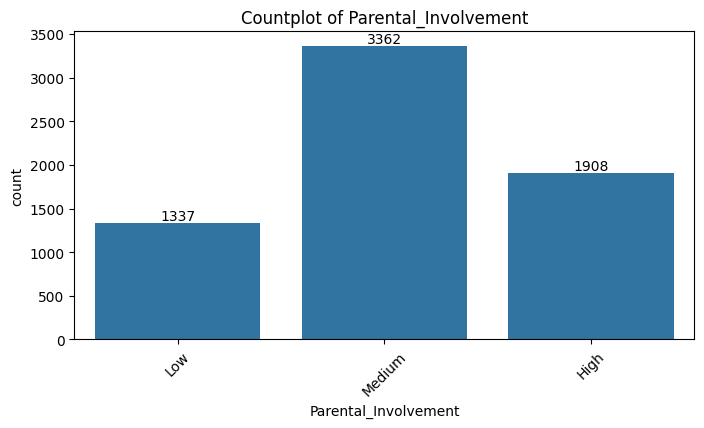

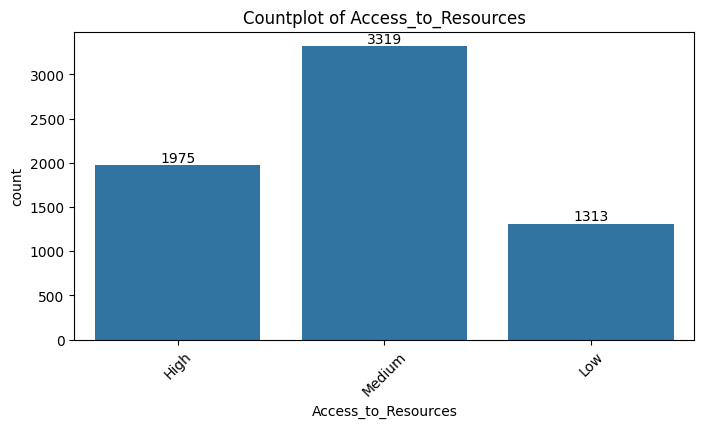

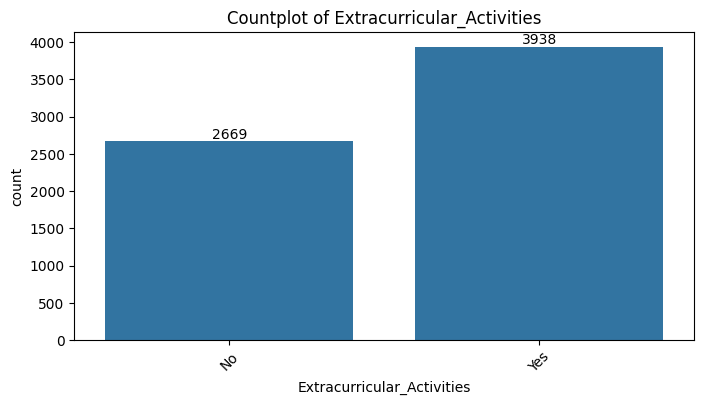

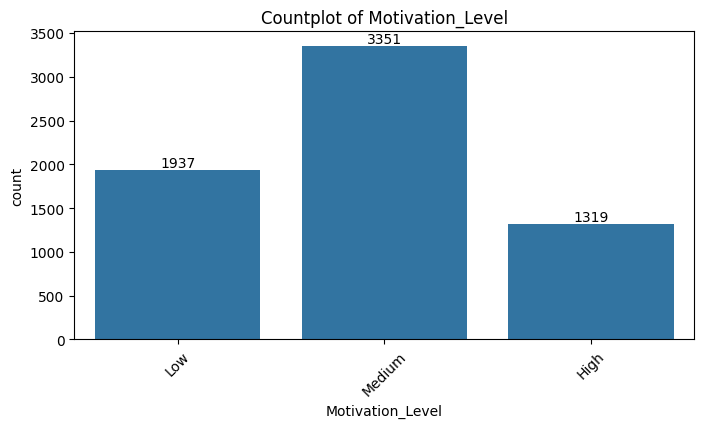

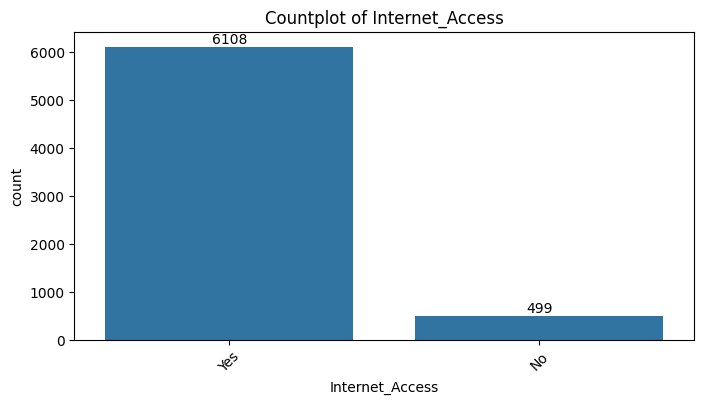

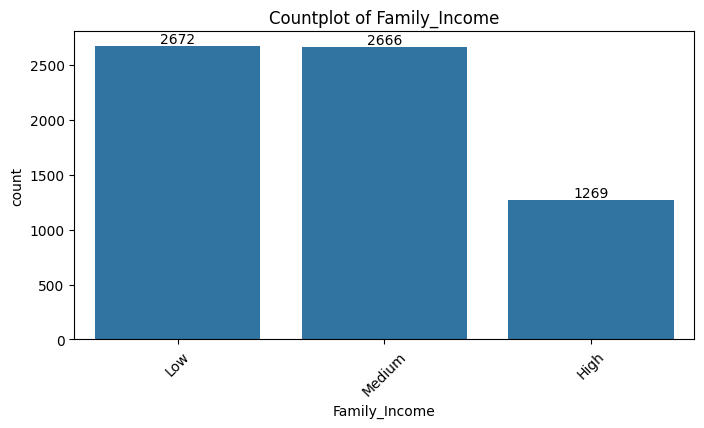

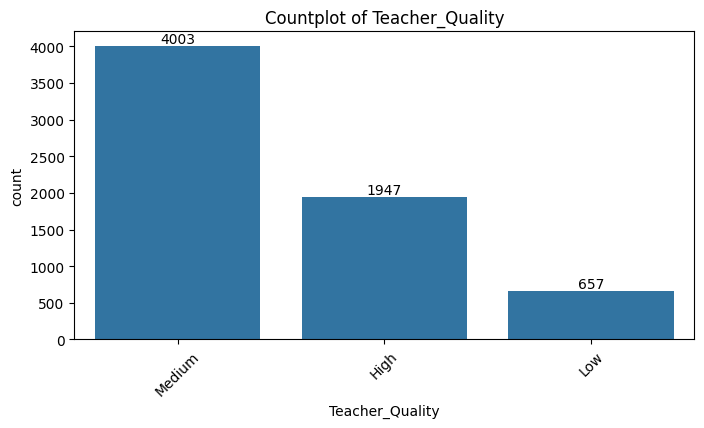

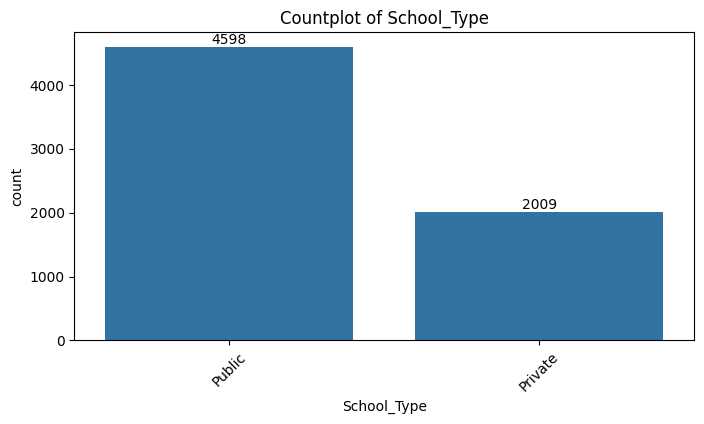

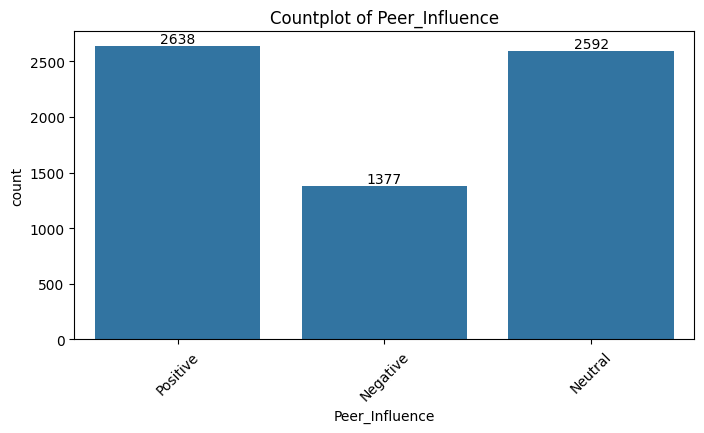

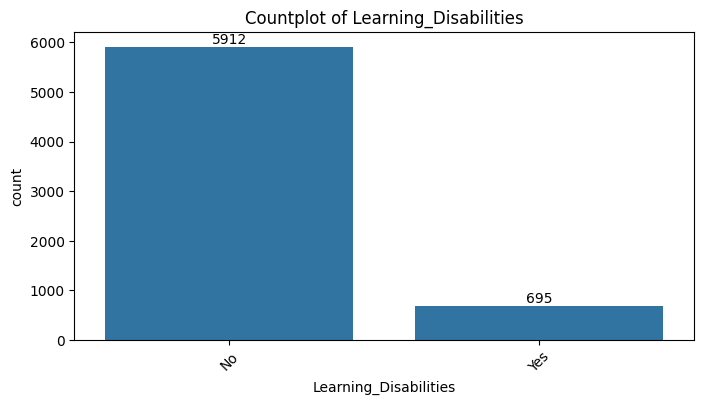

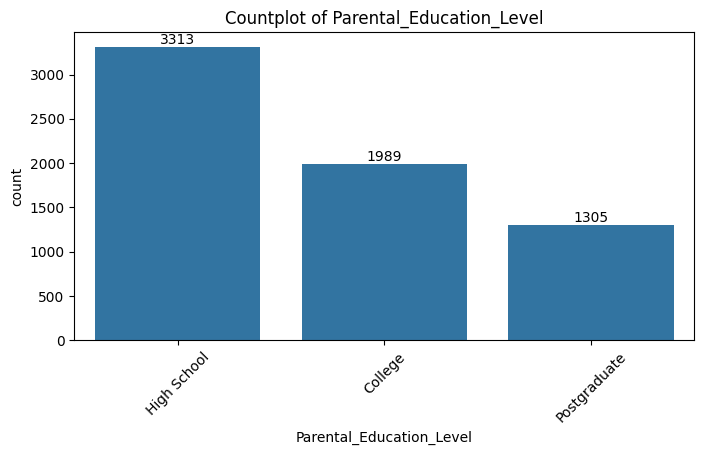

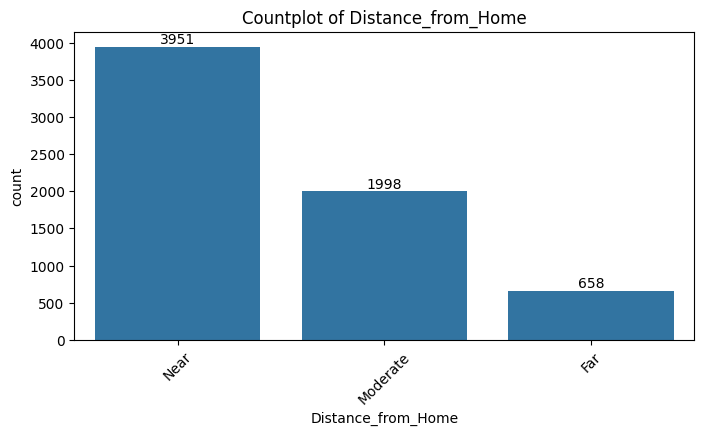

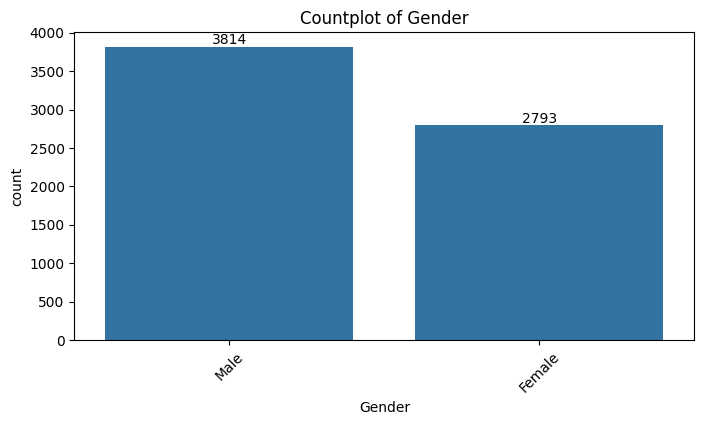

In [50]:
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    ax = sns.countplot(x=data[col])
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45)
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom')
    plt.show()

Parental_Involvement:
Most students report medium parental involvement (3362), followed by high (1908) and low (1337). This suggests that parental engagement is generally moderate.

Access_to_Resources:
The majority have medium access (3319), with fewer students having high (1975) or low (1313) access, indicating most students have adequate resources.

Extracurricular_Activities:
More students participate in extracurricular activities (Yes: 3938) than those who do not (No: 2669), showing a strong engagement outside academics.

Motivation_Level:
Most students have medium motivation (3351), with low (1937) and high (1319) motivation levels less common, suggesting motivation is generally moderate.

Internet_Access:
Nearly all students have internet access (Yes: 6108), while very few do not (No: 499), indicating good digital connectivity.

Family_Income:
The distribution is fairly even between low (2672) and medium (2666) income, with fewer students from high-income families (1269).

Teacher_Quality:
Most students rate teacher quality as medium (4003), with high (1947) and low (657) ratings less frequent, suggesting average teacher performance.

School_Type:
Most students attend public schools (4598), while fewer are in private schools (2009), indicating a public school majority.

Peer_Influence:
Peer influence is mostly positive (2638) or neutral (2592), with fewer reporting negative influence (1377).

Learning_Disabilities:
Most students do not have learning disabilities (No: 5912), while a small group does (Yes: 695).

Parental_Education_Level:
Most parents have a high school education (3313), followed by college (1989) and postgraduate (1305), indicating moderate parental education.

Distance_from_Home:
Most students live near the school (3951), with moderate (1998) and far (658) distances less common.

Gender:
There are more male students (3814) than female students (2793), showing a gender imbalance.

#### Bivariate Analysis

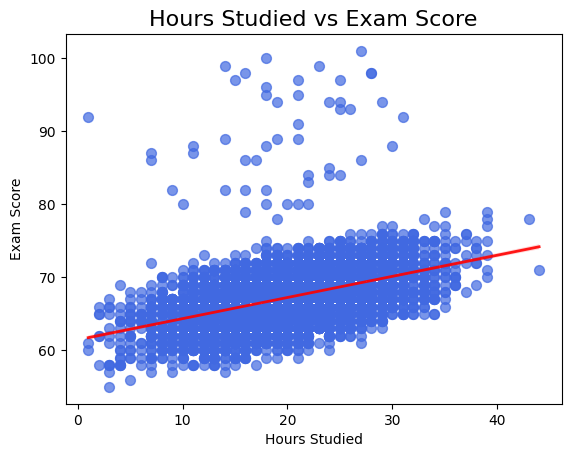

In [51]:
sns.regplot(
    data=data,
    x='Hours_Studied',
    y='Exam_Score',
    scatter_kws={'color': 'royalblue', 's': 50, 'alpha': 0.7},   
    line_kws={'color': 'red', 'linewidth': 2, 'alpha': 0.9}  
)

plt.title('Hours Studied vs Exam Score', fontsize=16)
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.show()

## Hours Studied vs Exam Score
- Shows a positive correlation between hours studied and exam scores, with a trend line indicating higher scores with more study time.

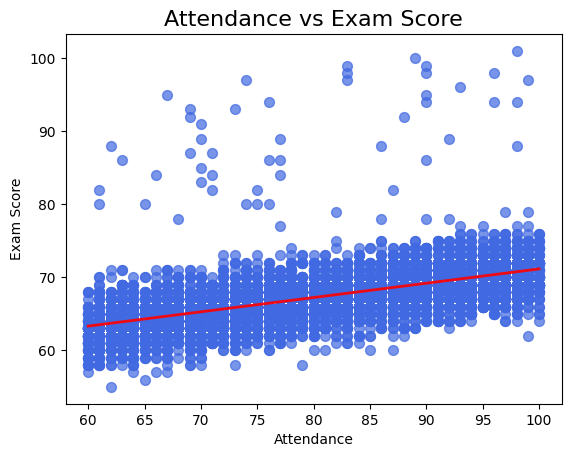

In [52]:
sns.regplot(
    data=data,
    x='Attendance',
    y='Exam_Score',
    scatter_kws={'color': 'royalblue', 's': 50, 'alpha': 0.7},
    line_kws={'color': 'red', 'linewidth': 2, 'alpha': 0.9}
)
plt.title('Attendance vs Exam Score', fontsize=16)
plt.xlabel('Attendance')
plt.ylabel('Exam Score')
plt.show()

##### Attendance vs Exam Score
- Displays a positive correlation between attendance percentage and exam scores, with a trend line suggesting better performance with higher attendance.

C:\Users\Ali Madian\AppData\Local\Temp\ipykernel_33844\3065539291.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


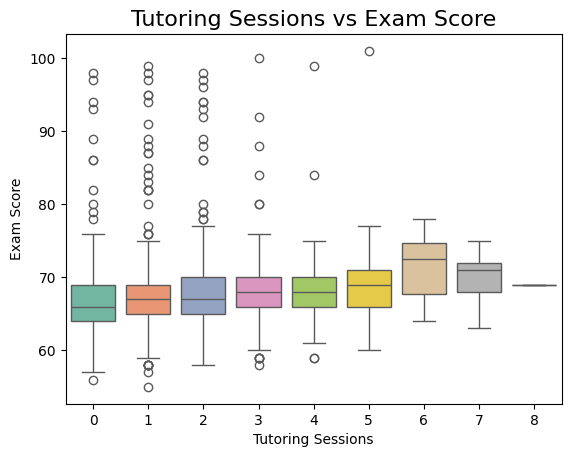

In [53]:
sns.boxplot(
    data=data,
    x='Tutoring_Sessions',
    y='Exam_Score',
    palette='Set2'
)
plt.title('Tutoring Sessions vs Exam Score', fontsize=16)
plt.xlabel('Tutoring Sessions')
plt.ylabel('Exam Score')
plt.show()

##### Tutoring Sessions vs Exam Score
- Indicates that exam scores improve with an increasing number of tutoring sessions, shown through box plots with higher medians as sessions increase.


C:\Users\Ali Madian\AppData\Local\Temp\ipykernel_33844\675260215.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


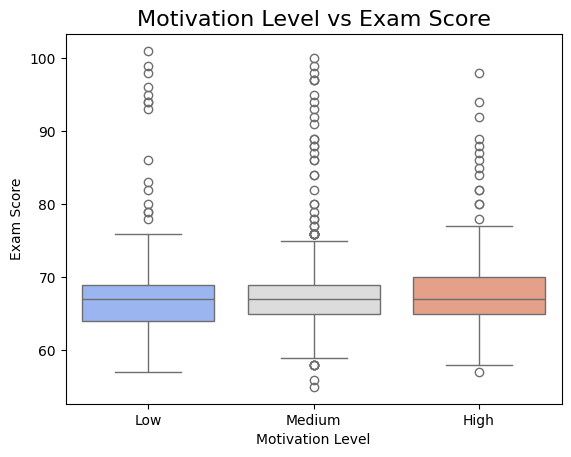

In [54]:
sns.boxplot(
    data=data,
    x='Motivation_Level',
    y='Exam_Score',
    order=['Low', 'Medium', 'High'],
    palette='coolwarm'
)
plt.title('Motivation Level vs Exam Score', fontsize=16)
plt.xlabel('Motivation Level')
plt.ylabel('Exam Score')
plt.show()


##### Motivation Level vs Exam Score
- Highlights higher exam scores with increasing motivation levels, depicted by box plots showing a clear upward trend.

C:\Users\Ali Madian\AppData\Local\Temp\ipykernel_33844\3209021884.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


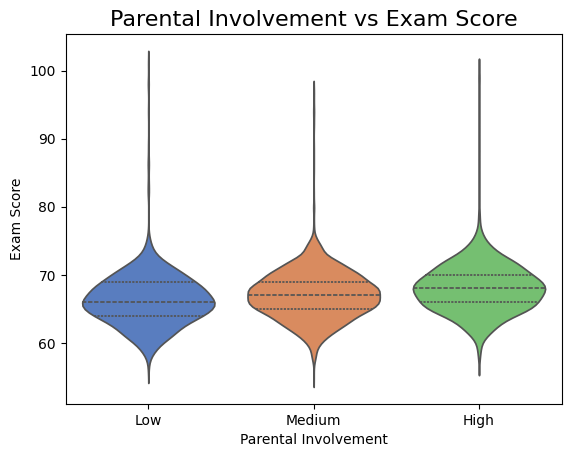

In [55]:
sns.violinplot(
    data=data,
    x='Parental_Involvement',
    y='Exam_Score',
    order=['Low', 'Medium', 'High'],
    palette='muted',
    inner='quartile'
)
plt.title('Parental Involvement vs Exam Score', fontsize=16)
plt.xlabel('Parental Involvement')
plt.ylabel('Exam Score')
plt.show()


##### Parental Involvement vs Exam Score
- Suggests that higher parental involvement correlates with better exam scores, shown through violin plots with wider distributions at higher scores.

C:\Users\Ali Madian\AppData\Local\Temp\ipykernel_33844\198698308.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


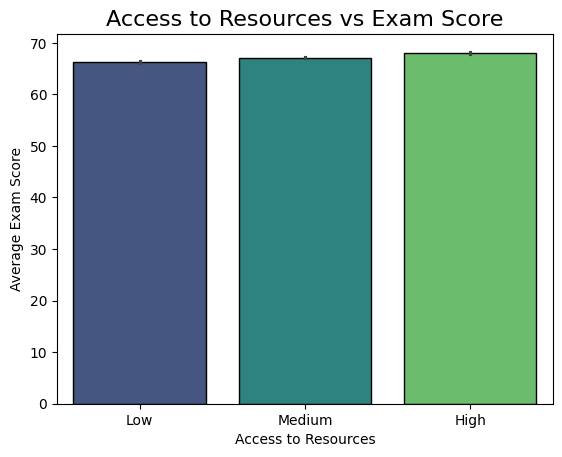

In [56]:
sns.barplot(
    data=data,
    x='Access_to_Resources',
    y='Exam_Score',
    order=['Low', 'Medium', 'High'],
    palette='viridis',
    edgecolor='black'
)
plt.title('Access to Resources vs Exam Score', fontsize=16)
plt.xlabel('Access to Resources')
plt.ylabel('Average Exam Score')
plt.show()

##### Access to Resources vs Exam Score
- Demonstrates that better access to resources is associated with higher average exam scores, shown by bar charts with increasing heights.

C:\Users\Ali Madian\AppData\Local\Temp\ipykernel_33844\1982772660.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.relplot(


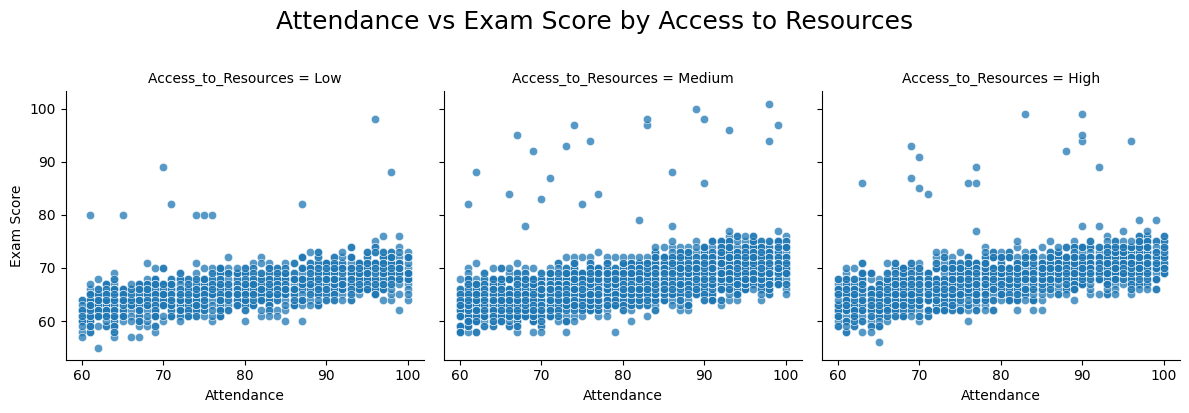

In [57]:
g = sns.relplot(
    data=data,
    x='Attendance',
    y='Exam_Score',
    col='Access_to_Resources',
    col_order=['Low', 'Medium', 'High'],
    kind='scatter',
    height=4,
    aspect=1,
    palette='coolwarm',
    alpha=0.75,
    edgecolor='w'
)
g.fig.suptitle('Attendance vs Exam Score by Access to Resources', fontsize=18, y=1.02)
g.set_axis_labels('Attendance', 'Exam Score')
plt.tight_layout()
plt.show()


##### Attendance vs Exam Score by Access to Resources
- Illustrates that higher access to resources strengthens the positive correlation between attendance and exam scores across three scatter plots.

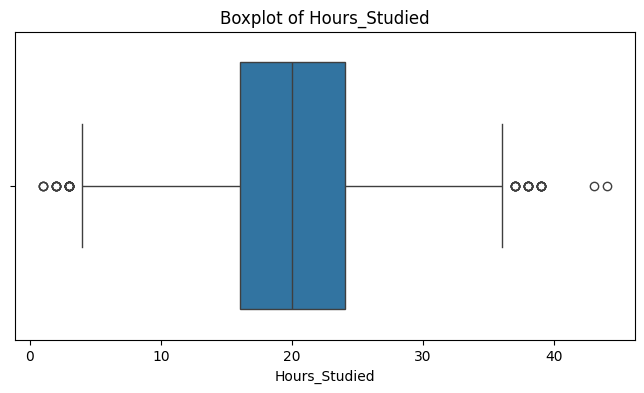

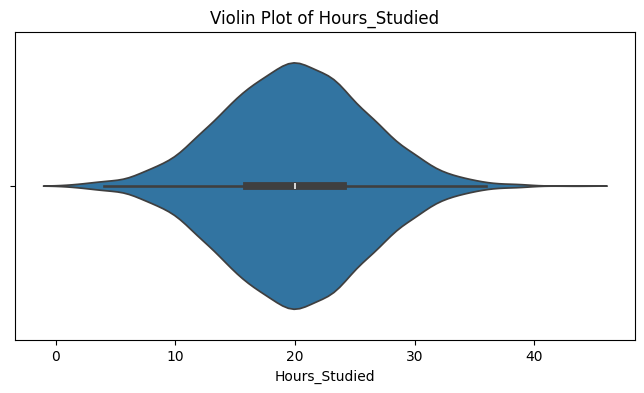

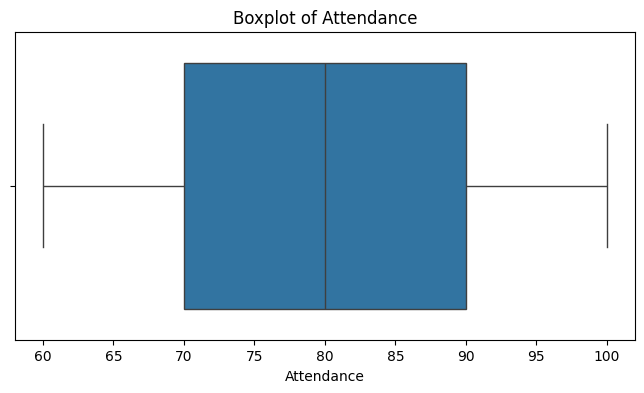

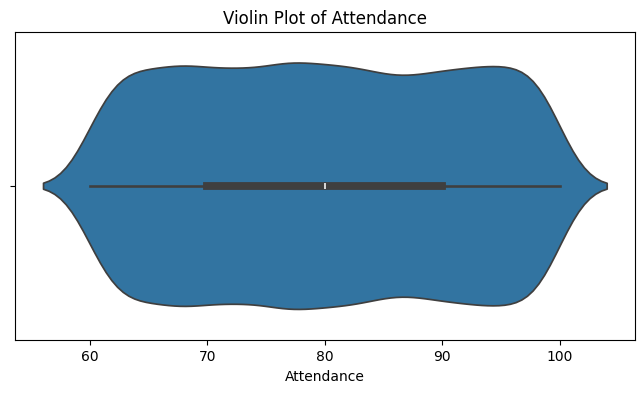

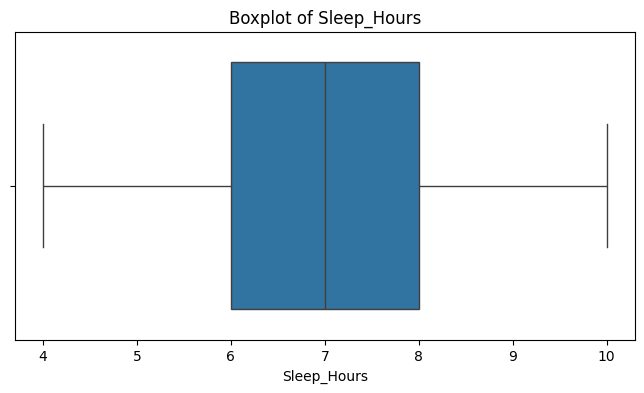

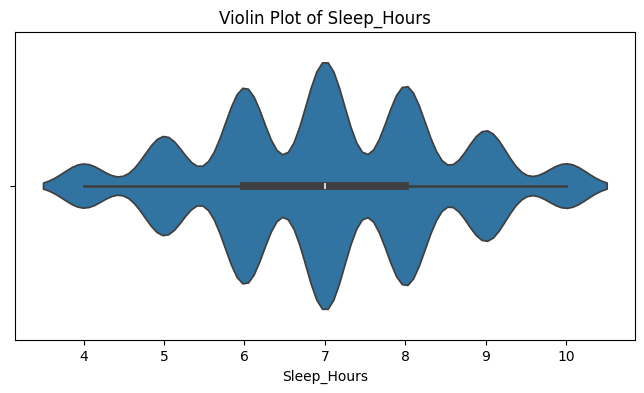

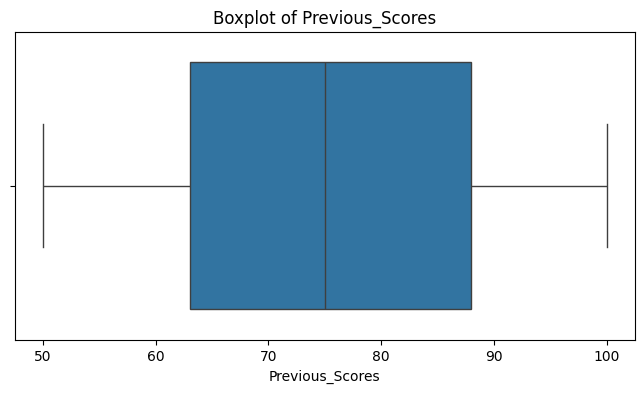

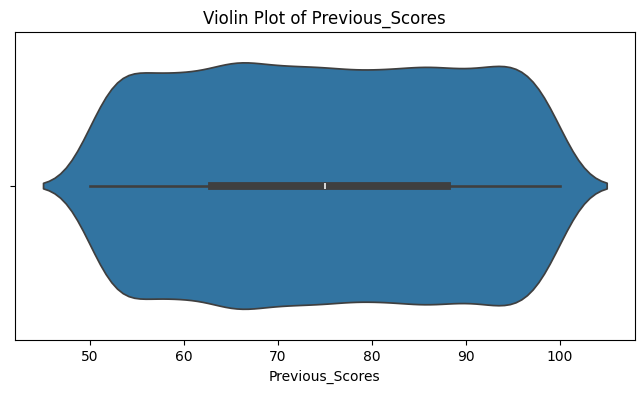

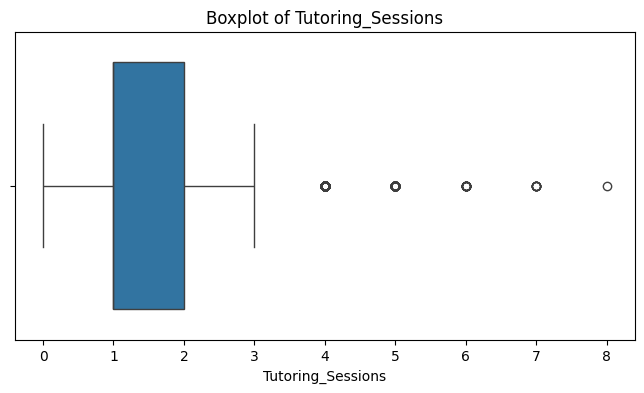

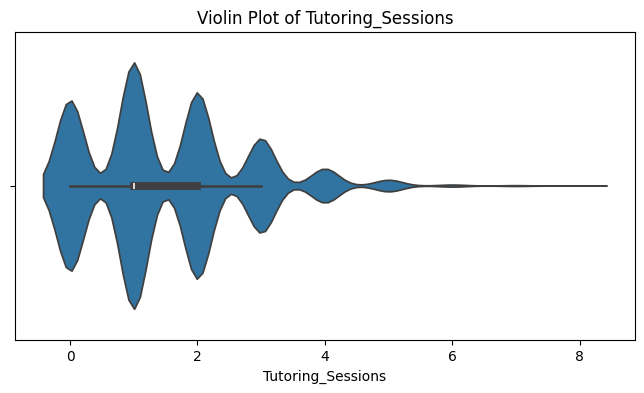

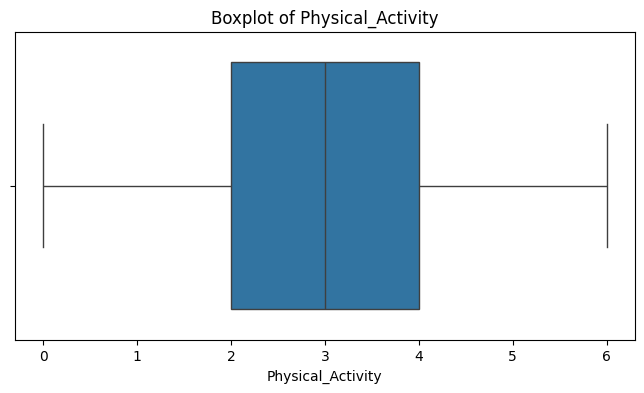

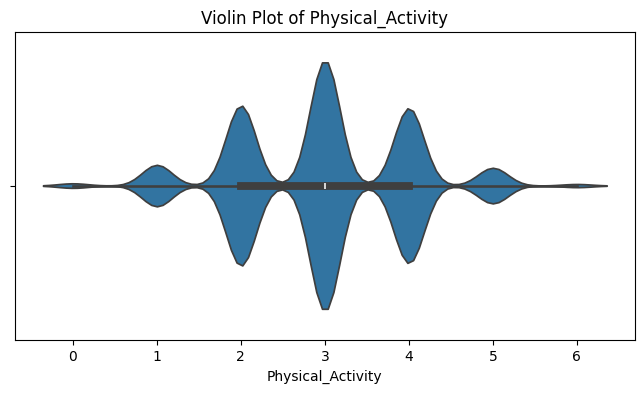

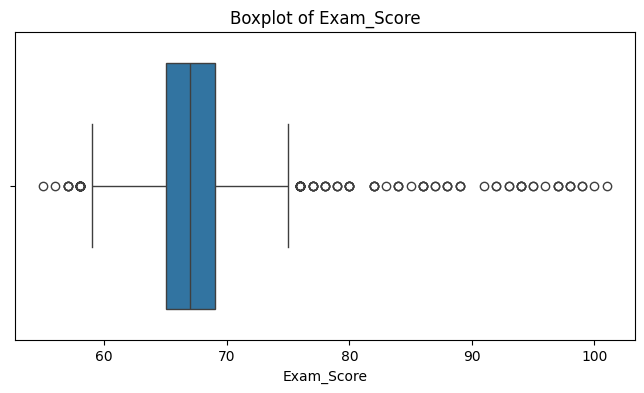

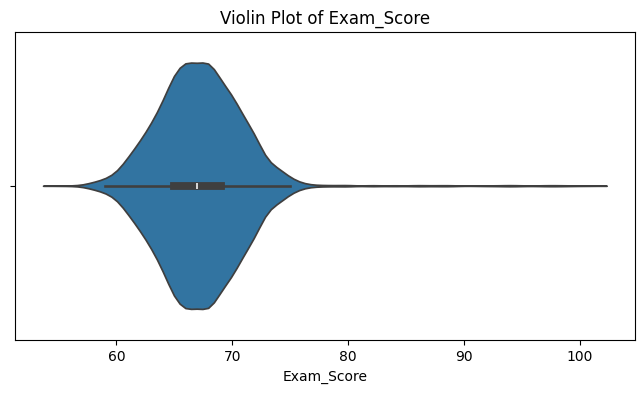

In [58]:
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()
    plt.figure(figsize=(8, 4))
    sns.violinplot(x=data[col])
    plt.title(f'Violin Plot of {col}')
    plt.show()

Outlier Analysis of Numerical Features
Hours Studied:

Boxplot: Median is around 20-25 hours, with outliers below 10 and above 35 hours, indicating some students study much less or much more than average.
Violin Plot: Symmetric distribution centered at 20-25 hours, with wider spreads at the extremes, confirming the presence of outliers.
Attendance:

Boxplot: Median is around 80-85%, with outliers below 65% and above 95%, showing a few students with very low or very high attendance.
Violin Plot: Broad, symmetric distribution centered at 80-85%, with even spread, supporting the boxplot findings.
Sleep Hours:

Boxplot: Median is around 7-8 hours, with outliers below 5 and above 9 hours, suggesting some students sleep significantly less or more than average.
Violin Plot: Multimodal distribution with peaks at 6, 7, and 8 hours, indicating varied sleep patterns.
Previous Scores:

Boxplot: Median is around 75-80%, with outliers below 50 and above 90, highlighting students with exceptionally low or high previous scores.
Violin Plot: Symmetric distribution centered at 75-80%, with even spread, confirming the boxplot's outlier detection.
Tutoring Sessions:

Boxplot: Median is around 1-2 sessions, with outliers from 5 to 8 sessions, showing a few students attend many more sessions than most.
Violin Plot: Multimodal distribution with peaks at 1, 3, and 5 sessions, reflecting diverse tutoring habits.
Physical Activity:

Boxplot: Median is around 3 activities, with no significant outliers, indicating most students have similar levels of physical activity.
Violin Plot: Bimodal distribution with peaks at 2 and 4 activities, suggesting two common activity levels.
Exam Score:

Boxplot: Median is around 70-75%, with numerous outliers above 90, showing some students achieve exceptionally high scores.
Violin Plot: Symmetric distribution centered at 70-75%, with a narrow spread, indicating most scores cluster around the median.

In [59]:
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)][col]
    percent_outliers = (outliers.count() / data[col].count()) * 100
    print(f"{col}: {percent_outliers:.2f}% outliers")

Hours_Studied: 0.65% outliers
Attendance: 0.00% outliers
Sleep_Hours: 0.00% outliers
Previous_Scores: 0.00% outliers
Tutoring_Sessions: 6.51% outliers
Physical_Activity: 0.00% outliers
Exam_Score: 1.57% outliers


In [60]:
for col in data.select_dtypes(include=['int64', 'float64']).columns:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)][col]
    percent_outliers = (outliers.count() / data[col].count()) * 100
    if percent_outliers > 5:
        data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
        data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])

In [61]:
categorical_cols = data.select_dtypes(include=['object']).columns
ordinal_cols = ['Parental_Involvement', 'Access_to_Resources', 'Motivation_Level', 
                'Family_Income', 'Teacher_Quality', 'Peer_Influence', 
                'Parental_Education_Level', 'Distance_from_Home']
binary_cols = ['Extracurricular_Activities', 'Internet_Access', 'School_Type', 
               'Learning_Disabilities', 'Gender']
ordinal_mappings = {
    'Parental_Involvement': ['Low', 'Medium', 'High'],
    'Access_to_Resources': ['Low', 'Medium', 'High'],
    'Motivation_Level': ['Low', 'Medium', 'High'],
    'Family_Income': ['Low', 'Medium', 'High'],
    'Teacher_Quality': ['Low', 'Medium', 'High'],
    'Peer_Influence': ['Negative', 'Neutral', 'Positive'],
    'Parental_Education_Level': ['High School', 'College', 'Postgraduate'],
    'Distance_from_Home': ['Near', 'Moderate', 'Far']
}

for col in ordinal_cols:
    ord_encoder = OrdinalEncoder(categories=[ordinal_mappings[col]])
    data[col] = ord_encoder.fit_transform(data[[col]])
    print(f"Encoded {col} (ordinal): {dict(zip(ordinal_mappings[col], range(len(ordinal_mappings[col]))))}")

label_encoders = {}
for col in binary_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    print(f"Encoded {col} (binary): {dict(zip(le.classes_, le.transform(le.classes_)))}")
    label_encoders[col] = le

for col in categorical_cols:
    print(f"\nValue counts for {col}:\n{data[col].value_counts()}")

print("\nData types:\n", data.dtypes)

Encoded Parental_Involvement (ordinal): {'Low': 0, 'Medium': 1, 'High': 2}
Encoded Access_to_Resources (ordinal): {'Low': 0, 'Medium': 1, 'High': 2}
Encoded Motivation_Level (ordinal): {'Low': 0, 'Medium': 1, 'High': 2}
Encoded Family_Income (ordinal): {'Low': 0, 'Medium': 1, 'High': 2}
Encoded Teacher_Quality (ordinal): {'Low': 0, 'Medium': 1, 'High': 2}
Encoded Peer_Influence (ordinal): {'Negative': 0, 'Neutral': 1, 'Positive': 2}
Encoded Parental_Education_Level (ordinal): {'High School': 0, 'College': 1, 'Postgraduate': 2}
Encoded Distance_from_Home (ordinal): {'Near': 0, 'Moderate': 1, 'Far': 2}
Encoded Extracurricular_Activities (binary): {'No': 0, 'Yes': 1}
Encoded Internet_Access (binary): {'No': 0, 'Yes': 1}
Encoded School_Type (binary): {'Private': 0, 'Public': 1}
Encoded Learning_Disabilities (binary): {'No': 0, 'Yes': 1}
Encoded Gender (binary): {'Female': 0, 'Male': 1}

Value counts for Parental_Involvement:
Parental_Involvement
1.0    3362
2.0    1908
0.0    1337
Name: co

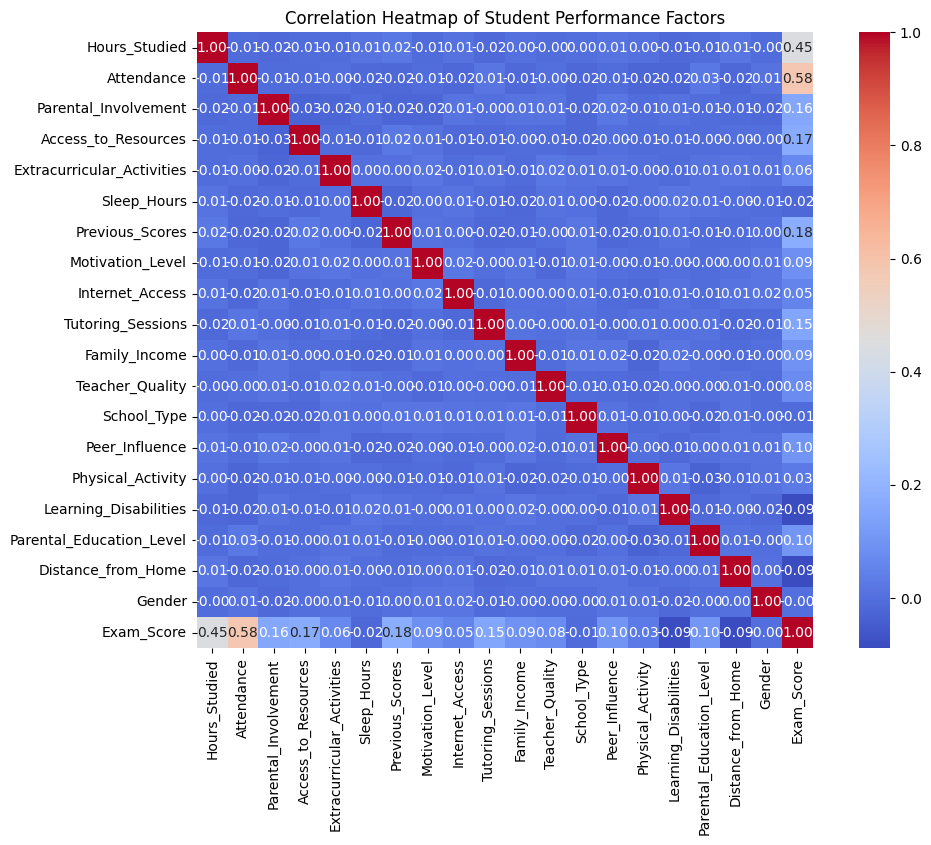

In [62]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap of Student Performance Factors')
plt.show()

Mean Squared Error (MSE): 10.86
Root Mean Squared Error (RMSE): 3.29
R-squared (R2): 0.23


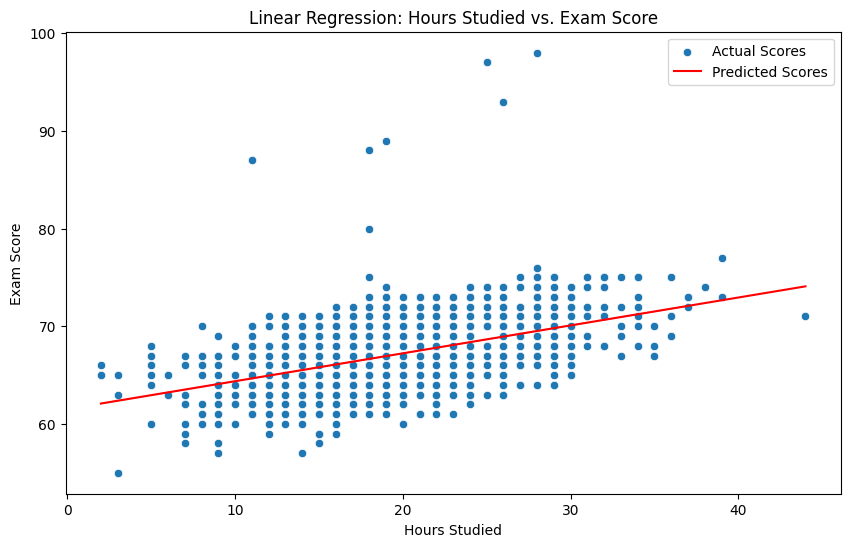

In [63]:
X = data[['Hours_Studied']]
y = data['Exam_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


y_pred = lr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['Hours_Studied'], y=y_test, label='Actual Scores')
sns.lineplot(x=X_test['Hours_Studied'], y=y_pred, color='red', label='Predicted Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title('Linear Regression: Hours Studied vs. Exam Score')
plt.legend()
plt.show()

Linear Regression Metrics:
Mean Squared Error (MSE): 10.86
Root Mean Squared Error (RMSE): 3.29
R-squared (R2): 0.23

Polynomial Regression (Degree 2) Metrics:
Mean Squared Error (MSE): 10.86
Root Mean Squared Error (RMSE): 3.30
R-squared (R2): 0.23


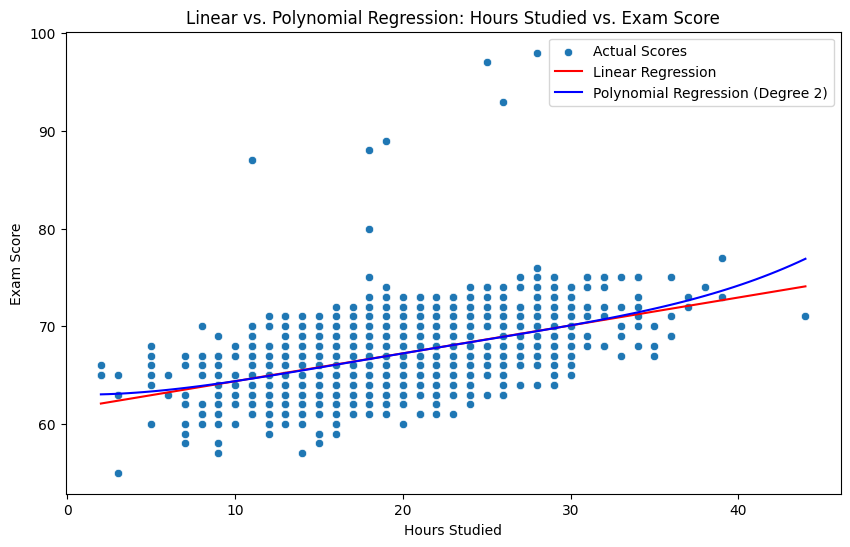

In [ ]:
X = data[['Hours_Studied']]
y = data['Exam_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

poly = PolynomialFeatures(degree=4)
polyreg = make_pipeline(poly, LinearRegression())
polyreg.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)
y_pred_poly = polyreg.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = mse_lr ** 0.5
r2_lr = r2_score(y_test, y_pred_lr)

mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = mse_poly ** 0.5
r2_poly = r2_score(y_test, y_pred_poly)

print("Linear Regression Metrics:")
print(f"Mean Squared Error (MSE): {mse_lr:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr:.2f}")
print(f"R-squared (R2): {r2_lr:.2f}")
print("\nPolynomial Regression (Degree 2) Metrics:")
print(f"Mean Squared Error (MSE): {mse_poly:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_poly:.2f}")
print(f"R-squared (R2): {r2_poly:.2f}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['Hours_Studied'], y=y_test, label='Actual Scores')

X_plot = pd.DataFrame({'Hours_Studied': np.linspace(X_test['Hours_Studied'].min(), X_test['Hours_Studied'].max(), 100)})
y_pred_lr_plot = lr_model.predict(X_plot)
y_pred_poly_plot = polyreg.predict(X_plot)

sns.lineplot(x=X_plot['Hours_Studied'], y=y_pred_lr_plot, color='red', label='Linear Regression')
sns.lineplot(x=X_plot['Hours_Studied'], y=y_pred_poly_plot, color='blue', label='Polynomial Regression (Degree 2)')

plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title('Linear vs. Polynomial Regression: Hours Studied vs. Exam Score')
plt.legend()
plt.show()

Linear Regression Metrics:
Mean Squared Error (MSE): 3.87
Root Mean Squared Error (RMSE): 1.97
R-squared (R2): 0.73

Polynomial Regression (Degree 2) Metrics:
Mean Squared Error (MSE): 3.90
Root Mean Squared Error (RMSE): 1.97
R-squared (R2): 0.72


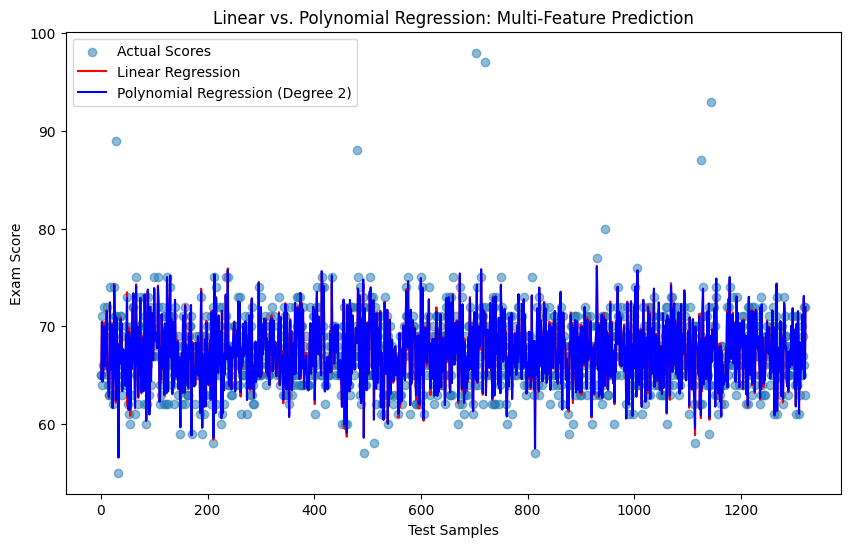

In [ ]:
X = data[['Hours_Studied', 'Previous_Scores', 'Attendance', 'Tutoring_Sessions',
          'Motivation_Level','Parental_Involvement','Access_to_Resources','Parental_Education_Level']]
y = data['Exam_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

poly = PolynomialFeatures(degree=2)
polyreg = make_pipeline(poly, LinearRegression())
polyreg.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)
y_pred_poly = polyreg.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = mse_lr ** 0.5
r2_lr = r2_score(y_test, y_pred_lr)

mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = mse_poly ** 0.5
r2_poly = r2_score(y_test, y_pred_poly)

print("Linear Regression Metrics:")
print(f"Mean Squared Error (MSE): {mse_lr:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr:.2f}")
print(f"R-squared (R2): {r2_lr:.2f}")
print("\nPolynomial Regression (Degree 2) Metrics:")
print(f"Mean Squared Error (MSE): {mse_poly:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_poly:.2f}")
print(f"R-squared (R2): {r2_poly:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label='Actual Scores', alpha=0.5)
plt.plot(range(len(y_test)), y_pred_lr, label='Linear Regression', color='red')
plt.plot(range(len(y_test)), y_pred_poly, label='Polynomial Regression (Degree 2)', color='blue')
plt.xlabel('Test Samples')
plt.ylabel('Exam Score')
plt.title('Linear vs. Polynomial Regression: Multi-Feature Prediction')
plt.legend()
plt.show()

=== FEATURE IMPORTANCE ANALYSIS ===

Pearson/Spearman Correlations (Numerical Features):
Attendance: 0.6724
Hours_Studied: 0.4810
Previous_Scores: 0.1919
Tutoring_Sessions: 0.1635
Physical_Activity: 0.0291
Sleep_Hours: -0.0076

ANOVA F-scores (Categorical Features):
Access_to_Resources: 7.2103
Parental_Involvement: 6.0272
Parental_Education_Level: 3.2988
Learning_Disabilities: 3.2608
Distance_from_Home: 2.7358
Peer_Influence: 2.7326
Motivation_Level: 2.3403
Family_Income: 2.2690
Teacher_Quality: 1.9907
Extracurricular_Activities: 1.7111
Internet_Access: 1.6648
Gender: 1.2503
School_Type: 0.9696

Kendall Tau Correlations (Categorical Features):
Access_to_Resources: 0.1516
Parental_Involvement: 0.1394
Parental_Education_Level: 0.0927
Peer_Influence: 0.0895
Learning_Disabilities: -0.0823
Distance_from_Home: -0.0810
Family_Income: 0.0792
Motivation_Level: 0.0757
Teacher_Quality: 0.0676
Extracurricular_Activities: 0.0544
Internet_Access: 0.0529
School_Type: -0.0098
Gender: 0.0063


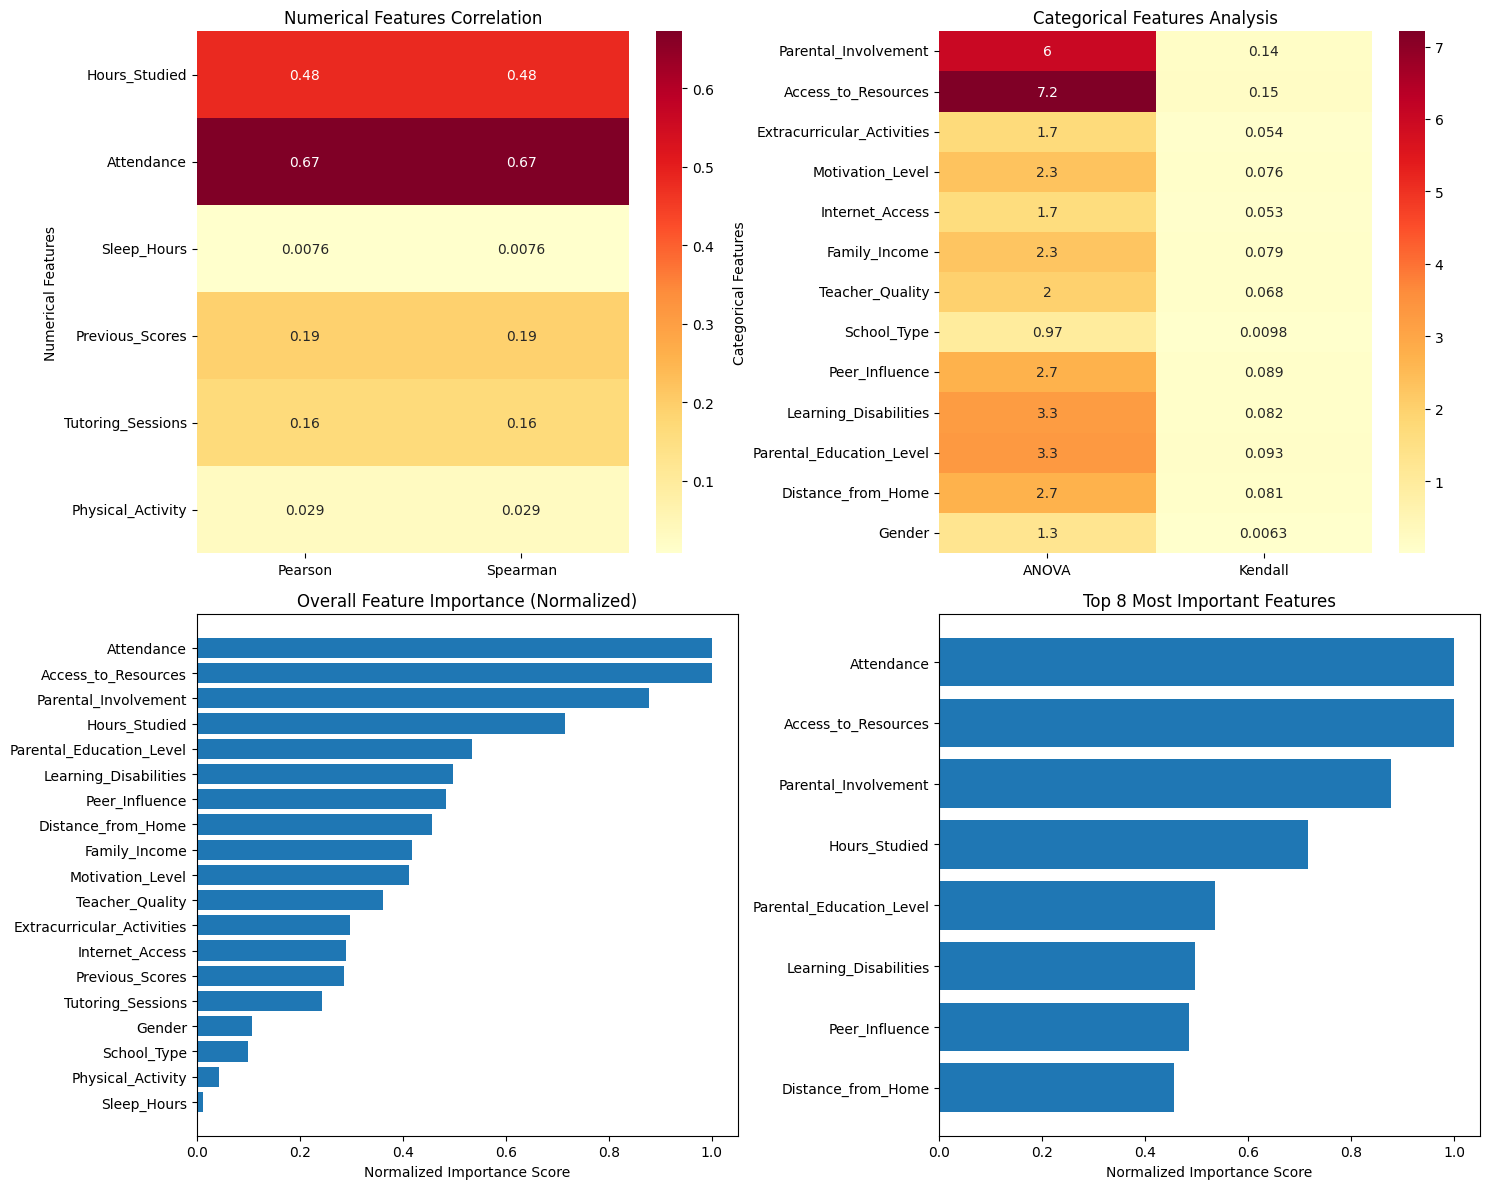


=== TOP 8 FEATURES (Normalized Importance) ===
1. Attendance (Numerical): 1.0000
2. Access_to_Resources (Categorical): 1.0000
3. Parental_Involvement (Categorical): 0.8776
4. Hours_Studied (Numerical): 0.7153
5. Parental_Education_Level (Categorical): 0.5346
6. Learning_Disabilities (Categorical): 0.4974
7. Peer_Influence (Categorical): 0.4846
8. Distance_from_Home (Categorical): 0.4568

Selected features for modeling: ['Attendance', 'Access_to_Resources', 'Parental_Involvement', 'Hours_Studied', 'Parental_Education_Level', 'Learning_Disabilities', 'Peer_Influence', 'Distance_from_Home']
Feature matrix shape: (6607, 8)

=== FEATURE IMPORTANCE SUMMARY TABLE ===
                   Feature        Type Spearman_Corr ANOVA_F Kendall_Tau Overall_Importance
                Attendance   Numerical        0.6724     N/A         N/A             1.0000
       Access_to_Resources Categorical           N/A  7.2103      0.1516             1.0000
      Parental_Involvement Categorical           N/A  

In [66]:
numerical_cols = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']
categorical_cols = ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']
y = data['Exam_Score']

numerical_features = [col for col in numerical_cols if col != 'Exam_Score']

pearson_corrs = {}
for col in numerical_features:
    corr, _ = spearmanr(data[col], y)  
    pearson_corrs[col] = corr

spearman_corrs = {}
for col in numerical_features:
    corr, _ = spearmanr(data[col], y)
    spearman_corrs[col] = corr

anova_selector = SelectKBest(score_func=f_classif, k='all')
X_categorical = data[categorical_cols]
anova_selector.fit(X_categorical, y)
anova_scores = dict(zip(categorical_cols, anova_selector.scores_))

kendall_corrs = {}
for col in categorical_cols:
    corr, _ = kendalltau(data[col], y)
    kendall_corrs[col] = corr

print("=== FEATURE IMPORTANCE ANALYSIS ===\n")

print("Pearson/Spearman Correlations (Numerical Features):")
for col, score in sorted(pearson_corrs.items(), key=lambda x: abs(x[1]), reverse=True):
    print(f"{col}: {score:.4f}")

print(f"\nANOVA F-scores (Categorical Features):")
for col, score in sorted(anova_scores.items(), key=lambda x: abs(x[1]), reverse=True):
    print(f"{col}: {score:.4f}")

print(f"\nKendall Tau Correlations (Categorical Features):")
for col, score in sorted(kendall_corrs.items(), key=lambda x: abs(x[1]) if x[1] is not None else 0, reverse=True):
    print(f"{col}: {score:.4f}")

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

numerical_methods = ['Pearson', 'Spearman']
numerical_scores_matrix = np.zeros((len(numerical_features), len(numerical_methods)))

for i, method in enumerate(numerical_methods):
    if method == 'Pearson':
        scores = [abs(pearson_corrs[col]) for col in numerical_features]
    else:  # Spearman
        scores = [abs(spearman_corrs[col]) for col in numerical_features]
    numerical_scores_matrix[:, i] = scores

sns.heatmap(numerical_scores_matrix, annot=True, cmap='YlOrRd', 
            xticklabels=numerical_methods, yticklabels=numerical_features,
            ax=axes[0, 0])
axes[0, 0].set_title('Numerical Features Correlation')
axes[0, 0].set_ylabel('Numerical Features')

categorical_methods = ['ANOVA', 'Kendall']
categorical_scores_matrix = np.zeros((len(categorical_cols), len(categorical_methods)))

for i, method in enumerate(categorical_methods):
    if method == 'ANOVA':
        scores = [abs(anova_scores[col]) for col in categorical_cols]
    else:  
        scores = [abs(kendall_corrs[col]) if kendall_corrs[col] is not None else 0 for col in categorical_cols]
    categorical_scores_matrix[:, i] = scores

sns.heatmap(categorical_scores_matrix, annot=True, cmap='YlOrRd', 
            xticklabels=categorical_methods, yticklabels=categorical_cols,
            ax=axes[0, 1])
axes[0, 1].set_title('Categorical Features Analysis')
axes[0, 1].set_ylabel('Categorical Features')

def normalize_scores(scores_dict):
    values = [abs(v) if v is not None else 0 for v in scores_dict.values()]
    if max(values) == 0:
        return {k: 0 for k in scores_dict.keys()}
    return {k: abs(v) / max(values) if v is not None else 0 for k, v in scores_dict.items()}

normalized_pearson = normalize_scores(pearson_corrs)
normalized_anova = normalize_scores(anova_scores)
normalized_kendall = normalize_scores(kendall_corrs)

all_features = numerical_features + categorical_cols
overall_importance = {}

for feature in all_features:
    scores = []
    if feature in normalized_pearson:
        scores.append(normalized_pearson[feature])
    if feature in normalized_anova:
        scores.append(normalized_anova[feature])
    if feature in normalized_kendall:
        scores.append(normalized_kendall[feature])
    
    overall_importance[feature] = np.mean(scores) if scores else 0

sorted_features = sorted(overall_importance.items(), key=lambda x: x[1], reverse=True)
features, importance_scores = zip(*sorted_features)

axes[1, 0].barh(range(len(features)), importance_scores)
axes[1, 0].set_yticks(range(len(features)))
axes[1, 0].set_yticklabels(features)
axes[1, 0].set_xlabel('Normalized Importance Score')
axes[1, 0].set_title('Overall Feature Importance (Normalized)')
axes[1, 0].invert_yaxis()

top_n = 8
top_features = sorted_features[:top_n]
top_feature_names = [feature for feature, _ in top_features]

axes[1, 1].barh(range(len(top_features)), [score for _, score in top_features])
axes[1, 1].set_yticks(range(len(top_features)))
axes[1, 1].set_yticklabels(top_feature_names)
axes[1, 1].set_xlabel('Normalized Importance Score')
axes[1, 1].set_title(f'Top {top_n} Most Important Features')
axes[1, 1].invert_yaxis()

plt.tight_layout()
plt.show()

# Print top features
print(f"\n=== TOP {top_n} FEATURES (Normalized Importance) ===")
for i, (feature, score) in enumerate(top_features, 1):
    feature_type = "Numerical" if feature in numerical_features else "Categorical"
    print(f"{i}. {feature} ({feature_type}): {score:.4f}")

print(f"\nSelected features for modeling: {top_feature_names}")
X = data[top_feature_names]
print(f"Feature matrix shape: {X.shape}")

summary_data = []
for feature in all_features:
    row = {'Feature': feature, 'Type': 'Numerical' if feature in numerical_features else 'Categorical'}
    
    if feature in pearson_corrs:
        row['Spearman_Corr'] = f"{pearson_corrs[feature]:.4f}"
    else:
        row['Spearman_Corr'] = 'N/A'
    
    if feature in anova_scores:
        row['ANOVA_F'] = f"{anova_scores[feature]:.4f}"
    else:
        row['ANOVA_F'] = 'N/A'
    
    if feature in kendall_corrs and kendall_corrs[feature] is not None:
        row['Kendall_Tau'] = f"{kendall_corrs[feature]:.4f}"
    else:
        row['Kendall_Tau'] = 'N/A'
    
    row['Overall_Importance'] = f"{overall_importance[feature]:.4f}"
    summary_data.append(row)

summary_df = pd.DataFrame(summary_data)
summary_df = summary_df.sort_values('Overall_Importance', ascending=False)
print(f"\n=== FEATURE IMPORTANCE SUMMARY TABLE ===")
print(summary_df.to_string(index=False))

In [67]:
y = data['Exam_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("=== MODEL COMPARISON: FOUR NON-LINEAR APPROACHES ===\n")
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"Number of features: {X_train.shape[1]}")
print(f"Features used: {', '.join(top_feature_names)}\n")

models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10),
    'Support Vector Regression': SVR(kernel='rbf', C=100, gamma='scale'),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42, max_depth=6),
    'LightGBM': lgb.LGBMRegressor(n_estimators=100, random_state=42, max_depth=6, verbose=-1)
}

model_names = list(models.keys())
results = {}
predictions = {}


=== MODEL COMPARISON: FOUR NON-LINEAR APPROACHES ===

Training set size: 5285 samples
Test set size: 1322 samples
Number of features: 8
Features used: Attendance, Access_to_Resources, Parental_Involvement, Hours_Studied, Parental_Education_Level, Learning_Disabilities, Peer_Influence, Distance_from_Home



In [68]:

for name, model in models.items():
    print(f"{'='*50}")
    print(f"MODEL: {name}")
    print(f"{'='*50}")
    
    if name == 'Support Vector Regression':
        X_train_use = X_train_scaled
        X_test_use = X_test_scaled
    else:
        X_train_use = X_train
        X_test_use = X_test
    
    model.fit(X_train_use, y_train)
    
    y_pred_test = model.predict(X_test_use)
    y_pred_train = model.predict(X_train_use)
    predictions[name] = y_pred_test
    
    mse_test = mean_squared_error(y_test, y_pred_test)
    rmse_test = np.sqrt(mse_test)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)
    
    mse_train = mean_squared_error(y_train, y_pred_train)
    rmse_train = np.sqrt(mse_train)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)
    
    if name == 'Support Vector Regression':
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    else:
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    
    results[name] = {
        'MSE_test': mse_test,
        'RMSE_test': rmse_test,
        'MAE_test': mae_test,
        'R2_test': r2_test,
        'MSE_train': mse_train,
        'RMSE_train': rmse_train,
        'MAE_train': mae_train,
        'R2_train': r2_train,
        'CV_R2_mean': cv_scores.mean(),
        'CV_R2_std': cv_scores.std(),
        'Overfitting_Gap_R2': r2_train - r2_test,
        'Overfitting_Gap_RMSE': rmse_test - rmse_train
    }
    
    print("TRAINING SET PERFORMANCE:")
    print(f'  MSE: {mse_train:.2f}')
    print(f'  RMSE: {rmse_train:.2f}')
    print(f'  MAE: {mae_train:.2f}')
    print(f'  R²: {r2_train:.3f}')
    
    print("\nTEST SET PERFORMANCE:")
    print(f'  MSE: {mse_test:.2f}')
    print(f'  RMSE: {rmse_test:.2f}')
    print(f'  MAE: {mae_test:.2f}')
    print(f'  R²: {r2_test:.3f}')
    
    print(f'\nCROSS-VALIDATION:')
    print(f'  R² CV Score: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})')
    
    r2_gap = r2_train - r2_test
    rmse_gap = rmse_test - rmse_train
    
    print(f'\n OVERFITTING ANALYSIS:')
    print(f'  R² Gap (Train - Test): {r2_gap:.3f}')
    print(f'  RMSE Gap (Test - Train): {rmse_gap:.2f}')
    
    if r2_gap > 0.1:
        print(f'    HIGH overfitting detected! Model memorizes training data.')
    elif r2_gap > 0.05:
        print(f'   MODERATE overfitting detected. Consider regularization.')
    elif r2_gap > 0.02:
        print(f'   SLIGHT overfitting. This is normal and acceptable.')
    else:
        print(f'   EXCELLENT generalization! No significant overfitting.')
    
    if rmse_gap < 0:
        print(f'   Model performs better on test set (unusual but possible)')
    elif rmse_gap > 5:
        print(f'   Large RMSE gap indicates poor generalization')
    
    if hasattr(model, 'feature_importances_'):
        feature_importance = pd.DataFrame({
            'feature': top_feature_names,
            'importance': model.feature_importances_
        }).sort_values('importance', ascending=False)
        
        print(f'\nFeature Importance:')
        for idx, row in feature_importance.iterrows():
            print(f'{row["feature"]}: {row["importance"]:.3f}')
    
    print(f'\n')


MODEL: Random Forest
TRAINING SET PERFORMANCE:
  MSE: 2.37
  RMSE: 1.54
  MAE: 0.94
  R²: 0.846

TEST SET PERFORMANCE:
  MSE: 5.63
  RMSE: 2.37
  MAE: 1.36
  R²: 0.602

CROSS-VALIDATION:
  R² CV Score: 0.547 (+/- 0.155)

 OVERFITTING ANALYSIS:
  R² Gap (Train - Test): 0.244
  RMSE Gap (Test - Train): 0.83
    HIGH overfitting detected! Model memorizes training data.

Feature Importance:
Attendance: 0.464
Hours_Studied: 0.304
Access_to_Resources: 0.055
Parental_Involvement: 0.053
Distance_from_Home: 0.039
Peer_Influence: 0.034
Parental_Education_Level: 0.033
Learning_Disabilities: 0.018


MODEL: Support Vector Regression
TRAINING SET PERFORMANCE:
  MSE: 5.13
  RMSE: 2.27
  MAE: 0.93
  R²: 0.666

TEST SET PERFORMANCE:
  MSE: 5.09
  RMSE: 2.26
  MAE: 1.25
  R²: 0.640

CROSS-VALIDATION:
  R² CV Score: 0.589 (+/- 0.163)

 OVERFITTING ANALYSIS:
  R² Gap (Train - Test): 0.026
  RMSE Gap (Test - Train): -0.01
   SLIGHT overfitting. This is normal and acceptable.
   Model performs better on tes

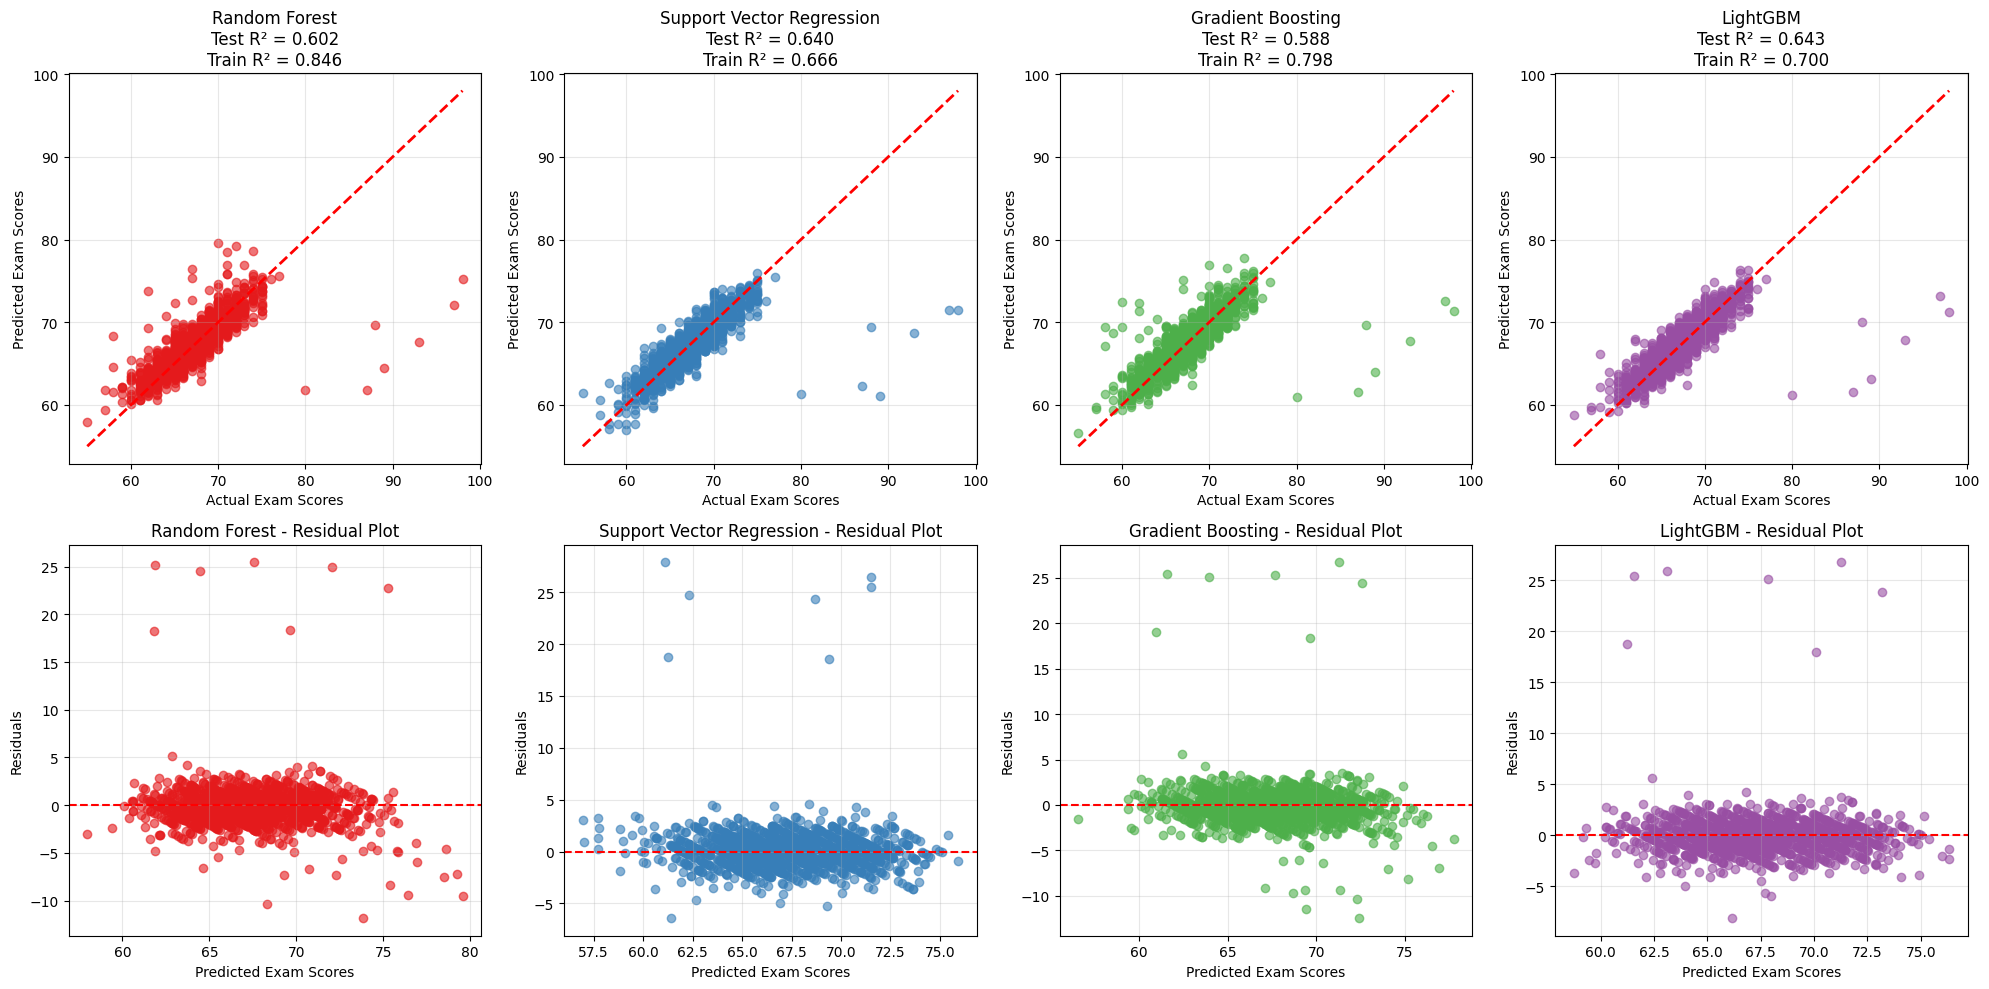

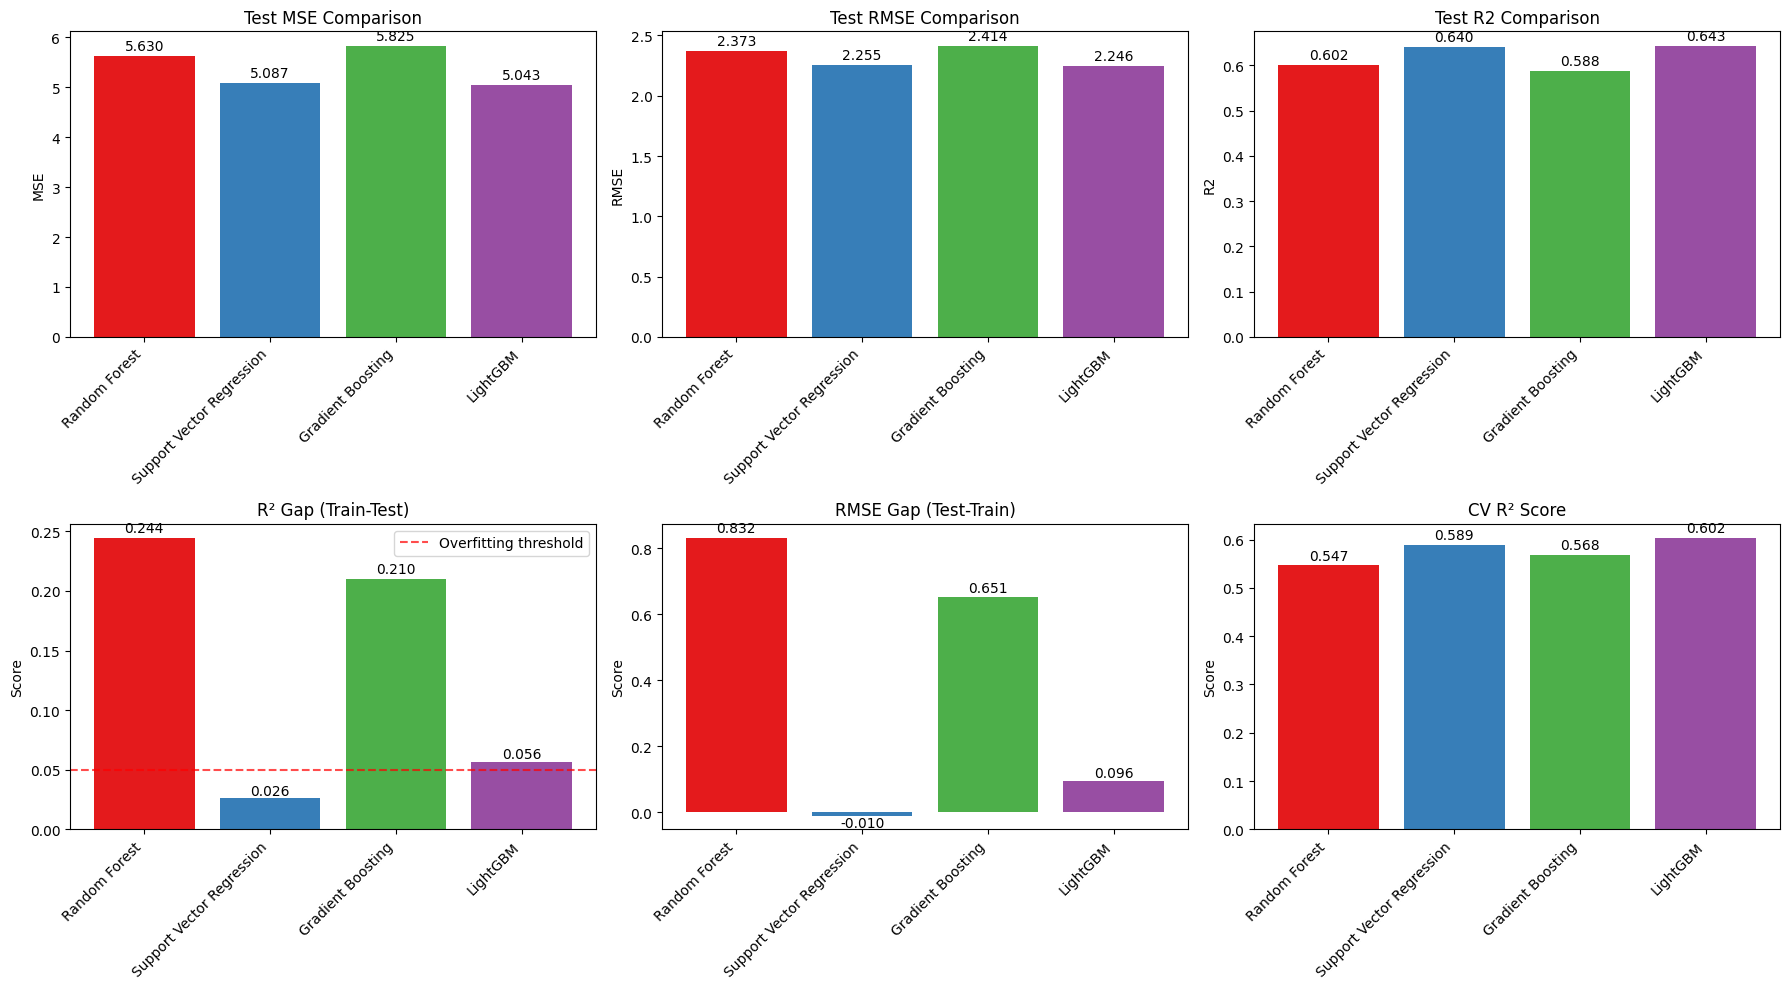

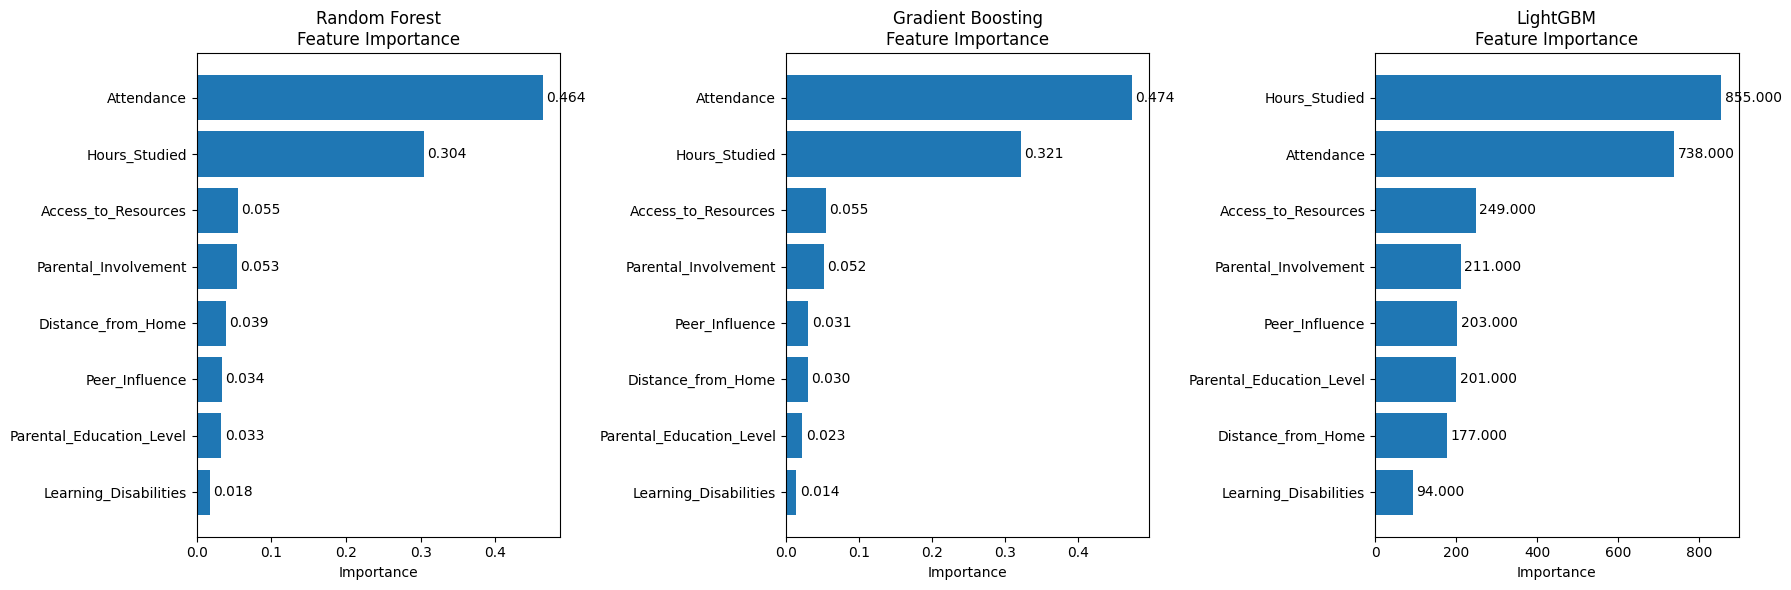

In [69]:

fig, axes = plt.subplots(2, 4, figsize=(20, 10))

for i, (name, y_pred) in enumerate(predictions.items()):
    ax = axes[0, i]
    ax.scatter(y_test, y_pred, alpha=0.6, color=plt.cm.Set1(i))
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    ax.set_xlabel('Actual Exam Scores')
    ax.set_ylabel('Predicted Exam Scores')
    ax.set_title(f'{name}\nTest R² = {results[name]["R2_test"]:.3f}\nTrain R² = {results[name]["R2_train"]:.3f}')
    ax.grid(True, alpha=0.3)

for i, (name, y_pred) in enumerate(predictions.items()):
    ax = axes[1, i]
    residuals = y_test - y_pred
    ax.scatter(y_pred, residuals, alpha=0.6, color=plt.cm.Set1(i))
    ax.axhline(y=0, color='r', linestyle='--')
    ax.set_xlabel('Predicted Exam Scores')
    ax.set_ylabel('Residuals')
    ax.set_title(f'{name} - Residual Plot')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

test_metrics = ['MSE_test', 'RMSE_test', 'R2_test']
for i, metric in enumerate(test_metrics):
    ax = axes[0, i]
    values = [results[model][metric] for model in model_names]
    colors = plt.cm.Set1(np.arange(len(model_names)))
    
    bars = ax.bar(model_names, values, color=colors)
    ax.set_title(f'Test {metric.split("_")[0]} Comparison')
    ax.set_ylabel(metric.split("_")[0])
    
    for bar, value in zip(bars, values):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                f'{value:.3f}', ha='center', va='bottom')
    
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

overfitting_metrics = ['Overfitting_Gap_R2', 'Overfitting_Gap_RMSE', 'CV_R2_mean']
metric_titles = ['R² Gap (Train-Test)', 'RMSE Gap (Test-Train)', 'CV R² Score']

for i, (metric, title) in enumerate(zip(overfitting_metrics, metric_titles)):
    ax = axes[1, i]
    values = [results[model][metric] for model in model_names]
    colors = plt.cm.Set1(np.arange(len(model_names)))
    
    bars = ax.bar(model_names, values, color=colors)
    ax.set_title(title)
    ax.set_ylabel('Score')
    
    if i == 0: 
        ax.axhline(y=0.05, color='red', linestyle='--', alpha=0.7, label='Overfitting threshold')
        ax.legend()
    
    for bar, value in zip(bars, values):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + height*0.01 if height >= 0 else height - abs(height)*0.05,
                f'{value:.3f}', ha='center', va='bottom' if height >= 0 else 'top')
    
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

tree_models = ['Random Forest', 'Gradient Boosting', 'LightGBM']
if len(tree_models) > 0:
    fig, axes = plt.subplots(1, len(tree_models), figsize=(18, 6))
    
    for i, model_name in enumerate(tree_models):
        model = models[model_name]
        feature_importance = pd.DataFrame({
            'feature': top_feature_names,
            'importance': model.feature_importances_
        }).sort_values('importance', ascending=True)
        
        ax = axes[i]
        ax.barh(feature_importance['feature'], feature_importance['importance'])
        ax.set_title(f'{model_name}\nFeature Importance')
        ax.set_xlabel('Importance')
        
        for j, (idx, row) in enumerate(feature_importance.iterrows()):
            ax.text(row['importance'] + max(feature_importance['importance'])*0.01, j,
                   f'{row["importance"]:.3f}', va='center')
    
    plt.tight_layout()
    plt.show()


In [70]:

print("=== MODEL PERFORMANCE SUMMARY (with Overfitting Analysis) ===")
summary_df = pd.DataFrame(results).T

display_columns = ['R2_train', 'R2_test', 'Overfitting_Gap_R2', 'RMSE_train', 'RMSE_test', 'Overfitting_Gap_RMSE', 'CV_R2_mean']
summary_display = summary_df[display_columns].round(3)

summary_display.columns = ['R² Train', 'R² Test', 'R² Gap', 'RMSE Train', 'RMSE Test', 'RMSE Gap', 'CV R²']
print(summary_display.to_string())

print(f"\n=== OVERFITTING RANKING (Best to Worst Generalization) ===")
overfitting_ranking = sorted(results.items(), key=lambda x: x[1]['Overfitting_Gap_R2'])
for i, (model, metrics) in enumerate(overfitting_ranking, 1):
    gap = metrics['Overfitting_Gap_R2']
    status = " Excellent" if gap <= 0.02 else " Good" if gap <= 0.05 else " Moderate" if gap <= 0.1 else " High"
    print(f"{i}. {model}: R² Gap = {gap:.3f} ({status})")

best_r2_model = max(results.keys(), key=lambda x: results[x]['R2_test'])
best_generalization = min(results.keys(), key=lambda x: results[x]['Overfitting_Gap_R2'])
best_rmse_model = min(results.keys(), key=lambda x: results[x]['RMSE_test'])

print(f"\n=== MODEL RECOMMENDATIONS (Considering Overfitting) ===")
print(f" Best Test Performance: {best_r2_model} (R² = {results[best_r2_model]['R2_test']:.3f})")
print(f" Best Generalization: {best_generalization} (R² Gap = {results[best_generalization]['Overfitting_Gap_R2']:.3f})")
print(f" Lowest Test RMSE: {best_rmse_model} (RMSE = {results[best_rmse_model]['RMSE_test']:.2f})")

print(f"\n=== DETAILED INSIGHTS ===")
for name, result in results.items():
    train_r2 = result['R2_train']
    test_r2 = result['R2_test']
    gap = result['Overfitting_Gap_R2']
    
    print(f"{name}:")
    print(f"   Training R²: {train_r2:.3f} | Test R²: {test_r2:.3f}")
    print(f"   Explains {test_r2*100:.1f}% of test variance")
    print(f"   Average test error: ±{result['RMSE_test']:.1f} points")
    print(f"   Overfitting gap: {gap:.3f} ({'Low' if gap <= 0.05 else 'Moderate' if gap <= 0.1 else 'High'})")
    print(f"   CV stability: ±{result['CV_R2_std']:.3f}")

print(f"\n=== FINAL RECOMMENDATION (Balancing Performance & Generalization) ===")

recommendation_scores = {}
for name, result in results.items():
    test_performance = result['R2_test']
    overfitting_penalty = max(0, result['Overfitting_Gap_R2'] - 0.02) * 2  
    cv_stability = 1 - result['CV_R2_std']  
    
    recommendation_scores[name] = test_performance - overfitting_penalty + (cv_stability * 0.1)

best_overall = max(recommendation_scores.keys(), key=lambda x: recommendation_scores[x])
best_score = recommendation_scores[best_overall]

if results[best_overall]['R2_test'] > 0.8 and results[best_overall]['Overfitting_Gap_R2'] < 0.05:
    print(f" WINNER: {best_overall}")
    print(f"    Excellent test performance (R² = {results[best_overall]['R2_test']:.3f})")
    print(f"    Great generalization (Gap = {results[best_overall]['Overfitting_Gap_R2']:.3f})")
    print(f"    This model is ready for production!")
elif results[best_overall]['Overfitting_Gap_R2'] > 0.1:
    print(f"  CAUTION: {best_overall} has best test score but shows overfitting")
    print(f"   Consider: {best_generalization} for better generalization")
    recommendation = f"Use {best_generalization} for safer deployment"
else:
    print(f" RECOMMENDED: {best_overall}")
    print(f"   Good balance of performance and generalization")

print(f"\n KEY TAKEAWAYS:")
high_overfitting = [name for name, result in results.items() if result['Overfitting_Gap_R2'] > 0.1]
if high_overfitting:
    print(f"   • Models with high overfitting: {', '.join(high_overfitting)}")
    print(f"   • Consider: Regularization, more data, or feature selection")

good_models = [name for name, result in results.items() if result['Overfitting_Gap_R2'] <= 0.05 and result['R2_test'] > 0.6]
if good_models:
    print(f"   • Well-generalized models: {', '.join(good_models)}")
    print(f"   • These are safe choices for deployment")

print(f"\n=== MODEL COMPLEXITY ANALYSIS ===")
complexity_analysis = {
    'Random Forest': 'High complexity, good interpretability through feature importance',
    'Support Vector Regression': 'Medium complexity, less interpretable but robust',
    'Gradient Boosting': 'High complexity, excellent performance, good feature importance',
    'LightGBM': 'High complexity, fastest training, excellent performance, great feature importance'
}

for model, analysis in complexity_analysis.items():
    print(f"{model}: {analysis}")

print(f"\n=== FINAL RECOMMENDATION ===")
if results[best_r2_model]['R2_test'] > 0.8:
    print(f" {best_r2_model} shows excellent performance with R² = {results[best_r2_model]['R2_test']:.3f}")
elif results[best_r2_model]['R2_test'] > 0.6:
    print(f" {best_r2_model} shows good performance with R² = {results[best_r2_model]['R2_test']:.3f}")
else:
    print(f"  All models show moderate performance. Consider feature engineering or more data.")

print(f"The {best_overall} model offers the best balance of performance and generalization for predicting exam scores.")

=== MODEL PERFORMANCE SUMMARY (with Overfitting Analysis) ===
                           R² Train  R² Test  R² Gap  RMSE Train  RMSE Test  RMSE Gap  CV R²
Random Forest                 0.846    0.602   0.244       1.541      2.373     0.832  0.547
Support Vector Regression     0.666    0.640   0.026       2.265      2.255    -0.010  0.589
Gradient Boosting             0.798    0.588   0.210       1.762      2.414     0.651  0.568
LightGBM                      0.700    0.643   0.056       2.149      2.246     0.096  0.602

=== OVERFITTING RANKING (Best to Worst Generalization) ===
1. Support Vector Regression: R² Gap = 0.026 ( Good)
2. LightGBM: R² Gap = 0.056 ( Moderate)
3. Gradient Boosting: R² Gap = 0.210 ( High)
4. Random Forest: R² Gap = 0.244 ( High)

=== MODEL RECOMMENDATIONS (Considering Overfitting) ===
 Best Test Performance: LightGBM (R² = 0.643)
 Best Generalization: Support Vector Regression (R² Gap = 0.026)
 Lowest Test RMSE: LightGBM (RMSE = 2.25)

=== DETAILED INSIGHTS =

## Conclusion

This project aimed to predict students' exam performance using a range of academic, behavioral, and socio-economic factors through regression-based machine learning techniques. A thorough analysis of the dataset was conducted, followed by model training and evaluation using various regression algorithms.

### Key Insights from the Data

- **Numerical features** such as `Hours_Studied`, `Attendance`, `Previous_Scores`, and `Sleep_Hours` displayed generally bell-shaped or bimodal distributions, reflecting natural variability in student habits and prior performance.
- **Categorical features** showed consistent trends: most students had medium levels of parental involvement, resource access, and motivation, while a large majority had internet access and no learning disabilities.
- Outlier analysis revealed meaningful variability in study patterns and exam scores, especially for `Tutoring_Sessions` and `Exam_Score`, warranting careful preprocessing.

### Feature Importance

Feature selection revealed eight key predictors of exam performance:

- Top numerical predictors: `Attendance` and `Hours_Studied`
- Top categorical predictors: `Access_to_Resources`, `Parental_Involvement`, and `Parental_Education_Level`
- These features demonstrated consistent importance across correlation analyses (Pearson, Spearman, Kendall Tau) and ANOVA F-scores.

### Model Evaluation

Multiple models were evaluated for accuracy and generalization ability:

| Model                 | R² (Train) | R² (Test) | RMSE (Test) | R² Gap | Overfitting |
|----------------------|------------|-----------|--------------|--------|-------------|
| Random Forest         | 0.846      | 0.602     | 2.37         | 0.244  | High        |
| Gradient Boosting     | 0.798      | 0.588     | 2.41         | 0.210  | High        |
| LightGBM              | 0.700      | 0.643     | 2.25         | 0.056  | Moderate    |
| Support Vector Regression | 0.666  | 0.640     | 2.26         | 0.026  | Low         |

- **Random Forest** and **Gradient Boosting** achieved high training scores but suffered from significant overfitting, indicating they memorized training patterns rather than generalizing.
- **Support Vector Regression (SVR)** demonstrated the **best generalization**, with minimal overfitting and solid test performance (R² = 0.640).
- **LightGBM** offered the **best overall test accuracy** (R² = 0.643) while maintaining only moderate overfitting.

### Final Recommendation

Given the trade-off between accuracy and generalization:

- **Support Vector Regression** is recommended for deployment due to its balanced performance, robustness to overfitting, and stable cross-validation results.
- For scenarios prioritizing raw predictive power, **LightGBM** remains a strong candidate but may benefit from additional regularization or data augmentation to reduce overfitting risk.

### Future Improvements

- Apply regularization or pruning techniques to reduce overfitting in ensemble models.
- Explore dimensionality reduction or feature transformation to improve generalization.
- Incorporate cross-domain data or time-series information (e.g., trends in scores) for more robust predictions.
- Expand the dataset to capture underrepresented subgroups or edge cases to further improve model resilience.

This analysis demonstrates how machine learning can effectively identify key drivers of academic success and predict exam outcomes with reasonable accuracy, offering valuable insights for educators and policymakers.
